# <center>ĐỒ ÁN CUỐI KỲ: KHOA HỌC DỮ LIỆU ỨNG DỤNG</center>

### <center>**Đề tài:** Dự đoán kết quả học tập của học sinh dựa trên việc chơi game</center>

**Nhóm:** Bumblebee - Nhóm 2

**Thành viên**

| MSSV     | Họ và tên       | Github                      |
|----------|-----------------|-----------------------------|
| 19120511 | Võ Văn Hiếu     | https://github.com/vv-hieu  |
| 19120526 | Huỳnh Đức Huy   | https://github.com/KaiKush  |
| 19120539 | Vương Thế Khang | https://github.com/vt-khang |


**Github repository:** https://github.com/vt-khang/KHDLUD-FinalProject

## Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

# More libraries
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix

# Set option
pd.set_option('display.max_colwidth', 999)
pd.set_option('float_format', '{:f}'.format)
sns.set_theme(style = 'whitegrid')

# Config warning
warnings.filterwarnings("ignore")

## A. THU THẬP DỮ LIỆU

### Mục tiêu đề tài

Cuộc thi này nhằm mục đích xác định những cách giúp học sinh tham gia vào nội dung giáo dục bằng hinh thức trò chơi giáo dục, từ đó đưa ra các dự đoán hiệu suất học tập của học sinh. Trong đồ án này sử dụng trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game) để theo dõi quá trình học tập của học sinh từ lớp 3-5, chủ yếu về các chủ đề lịch sử. Dưới đây là một số yếu tố cốt lõi của trò chơi:
- Nhân vật: Trong trò chơi này, bạn phải tương tác với nhân vật chính (nhân vật người chơi) cùng với các nhân vật khác nhau và ghé thăm nhiều địa điểm khác nhau trên bản đồ để tìm ra manh mối, từ đó giải đáp những bí ẩn liên quan đến lịch sử Wisconsin.
- Điều khiển: Để di chuyển qua các khung cảnh khác nhau, bạn phải sử dụng chuột để click vào nơi bạn muốn di chuyển, điều này cũng tương tự đối với tương tác với các nhân vật (đọc tài liệu, di chuyển, trò chuyện, ...).
- Notebook: Đây là nơi cung cấp thông tin và lưu những phát hiện của từng manh mối bạn có được trong trò chơi.
- Thời gian: Là thời gian bạn dành cho mỗi địa điểm khác nhau tùy thuộc vào cách bạn theo dõi câu chuyện của trò chơi.

### Giới thiệu bộ dữ liệu

Bộ dữ liệu của cuộc thi là dữ liệu về chuỗi thời gian được ghi lại từ trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game). Trò chơi được chia thành 4 chương, sau mỗi chương người chơi sẽ được trả lời một số câu hỏi. Có tổng cộng 18 câu hỏi liên quan trực tiếp trong trò chơi. Mục tiêu của cuộc thi là sử dụng bộ dữ liệu từ những câu hỏi trên để xác định xem người chơi có trả lời đúng câu hỏi hay không, từ đó có thể đưa ra các kết luận về hiệu suất học tập của học sinh.

Các file dữ liệu này bao gồm:
- **train.csv** - tập train
- **test.csv** - tập test
- **sample_submission.csv** - định dạng file dùng để nộp trên Kaggle
- **train_labels.csv** - câu trả lời cho 18 câu hỏi của mỗi session trong tập train

Cuộc thi: [Predict Student Performance from Game Play](https://www.kaggle.com/competitions/predict-student-performance-from-game-play) \
Nhà tổ chức cuộc thi: [Field Day Lab](https://fielddaylab.wisc.edu) \
Nhà tài trợ: [The Learning Agency Lab](https://www.the-learning-agency-lab.com) \
License: OPEN SOURCE - MIT

### Ứng dụng và ý nghĩa

- Thúc đẩy nghiên cứu về các phương pháp giáo dục, dạy học, tiếp thu kiến thức, ... từ các trò chơi giáo dục.
- Hỗ trợ các nhà phát triển phần mềm trò chơi (Game Developer) để tạo ra thêm nhiều trải nghiệm học tập có hiệu quả hơn cho học sinh.
- Thấy được các lợi ích rộng rãi của các nền tảng học tập dựa trên trò chơi đến với nhiều người hơn.

## B. KHÁM PHÁ DỮ LIỆU

Đầu tiên, ta sẽ xem thử từng tập dữ liệu trông như thế nào.
- Đọc dữ liệu từ file "train.csv" và lưu vào dataframe `raw_train_df`.
- Đọc dữ liệu từ file "test.csv" và lưu vào dataframe `raw_test_df`.
- Đọc dữ liệu từ file "train_labels.csv" và lưu vào dataframe `raw_train_labels_df`.

In [2]:
raw_train_df = pd.read_csv('data/train.csv')
raw_train_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.000000,494.000000,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4


In [3]:
raw_test_df = pd.read_csv('data/test.csv')
raw_test_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.000000,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.000000,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.000000,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0


In [4]:
raw_train_labels_df = pd.read_csv('data/train_labels.csv')
raw_train_labels_df.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Ta sẽ xem thử số dòng và số cột của từng tập dữ liệu trên.

In [5]:
def num_rows_and_cols(df, title):
  num_rows, num_cols = df.shape
  print(f'    {title}\n\t- Số dòng: {num_rows}\n\t- Số cột:  {num_cols}')

num_rows_and_cols(raw_train_df, 'Tập dữ liệu train')
num_rows_and_cols(raw_test_df, 'Tập dữ liệu test')
num_rows_and_cols(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train
	- Số dòng: 26296946
	- Số cột:  20
    Tập dữ liệu test
	- Số dòng: 3728
	- Số cột:  21
    Tập dữ liệu train_labels
	- Số dòng: 424116
	- Số cột:  2


Ta thấy được:
- Dữ liệu của tập train có kích thước **26,296,946 dòng x 20 cột**.
- Dữ liệu của tập test có kích thước **3,728 dòng x 21 cột**.
- Dữ liệu của tập train_labels có kích thước **424,116 x 2 cột**.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ các tập dữ liệu trên, ta thấy:
- Mỗi dòng của tập train và tập test chứa thông tin về một sự kiện trong từng index của một session trong trò chơi.
- Mỗi dòng của tập train_labels là câu trả lời cho từng câu hỏi của một session trong trò chơi.

Có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [6]:
def have_duplicated_dataset(df, title):
  have_duplicated_row = any(df.duplicated())
  print(f'    {title}:\n\t   {have_duplicated_row}')

have_duplicated_dataset(raw_train_df, 'Tập dữ liệu train')
have_duplicated_dataset(raw_test_df, 'Tập dữ liệu test')
have_duplicated_dataset(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train:
	   False
    Tập dữ liệu test:
	   False
    Tập dữ liệu train_labels:
	   False


Như vậy, không có dòng nào bị lặp lại ở các tập dữ liệu trên.

### Mỗi cột có ý nghĩa gì?

Mỗi cột của tập dữ liệu `raw_train_df` có ý nghĩa như sau:
-	**session_id** – id của session sự kiện xảy ra
-	**index** – index của các sự kiện trong session, dùng để phân biệt trong cùng một session
-	**elapsed_time** – khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại
-	**event_name** – tên của loại sự kiện
-	**name** – tên sự kiện (ví dụ: xác định xem sự kiện `notebook_click` là đang mở hay đóng cuốn sổ ghi chép)
-	**level** – sự kiện xảy ra ở level nào của trò chơi (từ 0 đến 22)
-	**page** – số trang của sự kiện (chỉ dành cho các sự kiện có liên quan đến notebook)
-	**room_coor_x** – tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**room_coor_y** – tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_x** – tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_y** – tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**hover_duration** – thời lượng hover (tính bằng ms) xảy ra trong bao lâu (chỉ dành cho các sự kiện hover)
-	**text** – văn bản mà người chơi nhìn thấy trong sự kiện này
-	**fqid** – id đầy đủ của sự kiện
-	**room_fqid** – id đầy đủ của room mà sự kiện xảy ra
-	**text_fqid** – id đầy đủ của văn bản
-	**fullscreen** – trò chơi có được mở chế độ toàn màn hình không
-	**hq** – trò chơi có bật chất lượng cao hay không
-	**music** – có bật hay tắt nhạc trong trò chơi không
-	**level_group** – nhóm level và nhóm các câu hỏi (0-4, 5-12, 13-22)

Các cột của tập dữ liệu `raw_test_df` giống với tập dữ liệu train, ngoài ra có thêm 1 cột sau:
- **session_level** - level của session sự kiện

Mỗi cột của tập dữ liệu `raw_train_labels_df` có ý nghĩa như sau:
- **session_id** – id của session sự kiện xảy ra
- **correct** - câu trả lời cho từng câu hỏi của một session

Ta sẽ tập trung vào phần khám phá dữ liệu của tập dữ liệu train.

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [7]:
raw_train_df.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

Hiện tại các cột dữ liệu có kiểu dữ liệu đúng, nên ta chỉ chuyển đổi các cột có ít giá trị khác nhau về dạng category để tối ưu bộ nhớ và tăng tốc độ xử lý dữ liệu. Vì kiểu dữ liệu category sẽ lưu dữ liệu ở dạng mã số thay vì chuỗi ký tự giúp tăng khả năng tối ưu hóa quá trình huấn luyện mô hình.

Như vậy có thể thấy có một số cột đang có kiểu dữ liệu `object` như "event_name", "name", "text", "fqid", "room_fqid", "text_fqid", "level_group". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu là `object`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `object_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [8]:
def nunique(s):
  return s.nunique()

object_cols = raw_train_df.select_dtypes(include = 'object').columns
object_col_df = raw_train_df[object_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
object_col_df

,nunique
text,597
fqid,128
text_fqid,126
room_fqid,19
event_name,11
name,6
level_group,3


Từ bảng thống kê trên, ta thấy các cột "event_name", "name", "level_group" nên đổi thành các cột thuộc dạng phân loại (categorical).

Thay đổi kiểu dữ liệu của các cột "event_name", "name", "level_group" sang kiểu dữ liệu dạng `category`.

In [9]:
raw_train_df[['event_name', 'name', 'level_group']] = raw_train_df[['event_name', 'name', 'level_group']].astype('category')

Tương tự như trên, như vậy có thể thấy có một số cột đang có kiểu dữ liệu dạng số `number` như "session_id", "index", "elapsed_time", "level", "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", "fullscreen", "hq", "music". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu dạng số như `int`, `float`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `number_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [10]:
number_cols = raw_train_df.select_dtypes(include = 'number').columns
number_col_df = raw_train_df[number_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
number_col_df

,nunique
room_coor_x,17438693
room_coor_y,13651023
elapsed_time,5042639
screen_coor_y,102591
screen_coor_x,57924
hover_duration,24101
session_id,23562
index,20348
level,23
page,7


Từ bảng thống kê bên trên, ta có thể thấy:
- Các "level", "fullscreen", "hq", "music" đang có kiểu dữ liệu `int`. Ta cần đưa các cột này về dạng `category`.
- Cột "page" đang có kiểu dữ liệu `float`. Ta cần đưa cột này về dạng `category` tương tự như trên.

Thay đổi kiểu dữ liệu của các cột "level", "fullscreen", "hq", "music" sang kiểu dữ liệu dạng `category`.

In [11]:
raw_train_df[['level', 'fullscreen', 'hq', 'music']] = raw_train_df[['level', 'fullscreen', 'hq', 'music']].astype('category')

Thay đổi kiểu dữ liệu của các cột "page" sang kiểu dữ liệu dạng `category`. Do kiểu dữ liệu của cột "page" đang là kiểu dữ liệu `float` nên ta sẽ đưa về kiểu dữ liệu `int` trước rồi mới đổi sang kiểu dữ liệu dạng `category`.

In [12]:
raw_train_df['page'] = raw_train_df['page'].astype('Int64').astype('category')

Xem lại kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [13]:
raw_train_df.dtypes

session_id           int64
index                int64
elapsed_time         int64
event_name        category
name              category
level             category
page              category
room_coor_x        float64
room_coor_y        float64
screen_coor_x      float64
screen_coor_y      float64
hover_duration     float64
text                object
fqid                object
room_fqid           object
text_fqid           object
fullscreen        category
hq                category
music             category
level_group       category
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numerical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị nhỏ nhất (min), giá trị trung bình (mean), giá trị trung vị (median), giá trị lớn nhất (max), các khoảng tứ phân vị (Q1, Q2, Q3) và độ lệch chuẩn (std). Sau đó ta sẽ lưu các giá trị này vào dataframe `numerical_col_df` thành 11 dòng là "num_missing_val", "ratio_missing_val", "count", "min", "mean", "median", "max", "Q1", "Q2", "Q3", "std".

In [14]:
def num_missing_val(s):
  return s.isna().sum()
def ratio_missing_val(s):
  return s.isna().mean() * 100
def count(s):
  return s.count();
def Q1(s):
  return s.quantile(0.25)
def Q2(s):
  return s.quantile(0.5)
def Q3(s):
  return s.quantile(0.75)

numerical_cols = raw_train_df.select_dtypes(include = 'number').columns
numerical_col_df = raw_train_df[numerical_cols].agg([num_missing_val, ratio_missing_val, count, min, np.mean, np.median, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,median,max,Q1,Q2,Q3,std
session_id,0,0.000000,26296946,20090312431273200.000000,21132488308433916.000000,21040213470142500.000000,22100221145014656.000000,21010216570082376.000000,21040213470142500.000000,21100516321490164.000000,571295349122915.375000
index,0,0.000000,26296946,0.000000,644.510240,595.000000,20473.000000,288.000000,595.000000,896.000000,545.787957
elapsed_time,0,0.000000,26296946,0.000000,4016693.894748,1014801.000000,1988606704.000000,439700.000000,1014801.000000,1747040.000000,31270320.364611
room_coor_x,2073272,7.884079,24223674,-1992.354569,-54.905793,-11.162797,1261.773745,-352.839501,-11.162797,296.651499,520.292583
room_coor_y,2073272,7.884079,24223674,-918.162349,-116.211852,-97.605339,543.616424,-212.718256,-97.605339,22.687860,218.470954
screen_coor_x,2073272,7.884079,24223674,0.000000,458.409812,447.000000,1919.000000,269.000000,447.000000,663.000000,247.938892
screen_coor_y,2073272,7.884079,24223674,0.000000,385.586034,397.000000,1440.000000,304.000000,397.000000,471.000000,129.816557
hover_duration,24294702,92.386021,2002244,0.000000,3471.003377,419.000000,245163690.000000,99.000000,419.000000,1266.000000,460202.415493


Quan sát bảng thống kê mô tả của các cột có kiểu dữ liệu dạng số (numerical), ta thấy giá trị lớn nhất của 2 cột "screen_coor_x" và "screen_coor_y" là **1919** và **1440**. Điều này có nghĩa là kích thước màn hình trò chơi chỉ đạt tối đa **1919x1440**. Trong khi đó, ta thấy các giá trị của 2 cột "room_coor_x" và "room_coor_y" có xuất hiện giá trị âm. Ta sẽ làm rõ điều này ở bước trực quan hóa dữ liệu.

Ngoài ra, ta thấy có xuất hiện giá trị bị thiếu ở các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", trong đó:
- Cột "hover_duration" có tỉ lệ giá trị bị thiếu nhiều nhất **(~92.39%)** so với các cột còn lại.
- Các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" đều có tỉ lệ giá trị bị thiếu là **7.88%**.
  
Ta sẽ xem thử phân bố các giá trị bị thiếu theo từng loại sự kiện dựa vào cột "event_name".

In [15]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[numerical_cols].round(2)

,session_id,index,elapsed_time,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
event_name,,,,,,,,
checkpoint,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
cutscene_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000
navigate_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notebook_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notification_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000


Như vậy có thể thấy:
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") và sự kiện "checkpoint" thì các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" thường bị thiếu chung với nhau.
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") thì cột "hover_duration" không bao giờ bị thiếu giá trị.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?


Với mỗi cột categorical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị xuất hiện nhiều nhất (mode), số lượng giá trị xuất hiện nhiều nhất (không xét giá trị NaN), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu các giá trị này vào dataframe `categical_col_df` thành 6 dòng là "num_missing_val", "ratio_missing_val", "count", "top", "freq", "nunique", "unique".

In [16]:
def unique(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]
def freq(s):
  return (s == s.mode()[0]).value_counts()[True]

categorical_cols = raw_train_df.select_dtypes(exclude = 'number').columns
categorical_col_df = raw_train_df[categorical_cols].agg([num_missing_val, ratio_missing_val, count, top, freq, nunique, unique]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,top,freq,nunique,unique
event_name,0,0.000000,26296946,navigate_click,11326433,11,"[cutscene_click, person_click, navigate_click, observation_click, notification_click, object_click, object_hover, map_hover, map_click, checkpoint, notebook_click]"
name,0,0.000000,26296946,undefined,12705785,6,"[basic, undefined, close, open, prev, next]"
level,0,0.000000,26296946,18,3499163,23,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]"
page,25732402,97.853196,564544,5,101171,7,"[0, 1, 3, 4, 5, 6, 2]"
text,16679807,63.428685,9617139,undefined,355969,597,"[undefined, Whatcha doing over there, Jo?, Just talking to Teddy., I gotta run to my meeting!, Can I come, Gramps?, Sure thing, Jo. Grab your notebook and come upstairs!, See you later, Teddy., I get to go to Gramps's meeting!, Now where did I put my notebook?, \u00f0\u0178\u02dc\u00b4, I love these photos of me and Teddy!, Found it!, Gramps is in trouble for losing papers?, This can't be right!, Gramps is a great historian!, Hmm. Button's still not working., Let's get started. The Wisconsin Wonders exhibit opens tomorrow!, Who wants to investigate the shirt artifact?, Not Leopold here. He's been losing papers lately., Hey!, It's true, they do keep going missing lately., See?, Besides, I already figured out the shirt., It's a women's basketball jersey!, That settles it., Wells, finish up your report., Leopold, why don't you help me set up in the Capitol?, We need to talk about that missing paperwork., Will do, Boss., Hey Jo, let's take a look at the shirt!, Your grampa is waiting ..."
fqid,8274415,31.465308,18022531,worker,1878958,128,"[intro, gramps, teddy, photo, notebook, retirement_letter, tobasement, janitor, toentry, groupconvo, report, boss, wells, directory, tocollection, cs, tunic, tunic.hub.slip, tostacks, outtolunch, tocloset, tomap, tunic.historicalsociety, tunic.kohlcenter, plaque, plaque.face.date, togrampa, tunic.capitol_0, chap1_finale, chap1_finale_c, tocloset_dirty, what_happened, trigger_scarf, trigger_coffee, tunic.capitol_1, tofrontdesk, archivist, magnify, tunic.humanecology, worker, businesscards, businesscards.card_0.next, businesscards.card_1.next, businesscards.card_bingo.next, businesscards.card_bingo.bingo, tohallway, tunic.drycleaner, logbook, logbook.page.bingo, tunic.library, tomicrofiche, reader, reader.paper0.next, reader.paper1.next, reader.paper2.bingo, wellsbadge, journals, journals.hub.topics, journals.pic_0.next, journals.pic_1.next, journals.pic_2.bingo, chap2_finale_c, ch3start, seescratches, tocage, glasses, directory.closeup.archivist, key, unlockdoor, confrontation, sav..."
room_fqid,0,0.000000,26296946,tunic.historicalsociety.entry,3622003,19,"[tunic.historicalsociety.closet, tunic.historicalsociety.basement, tunic.historicalsociety.entry, tunic.historicalsociety.collection, tunic.historicalsociety.stacks, tunic.kohlcenter.halloffame, tunic.capitol_0.hall, tunic.historicalsociety.closet_dirty, tunic.historicalsociety.frontdesk, tunic.humanecology.frontdesk, tunic.drycleaner.frontdesk, tunic.library.frontdesk, tunic.library.microfiche, tunic.capitol_1.hall, tunic.historicalsociety.cage, tunic.historicalsociety.collection_flag, tunic.wildlife.center, tunic.flaghouse.entry, tunic.capitol_2.hall]"
text_fqid,16679702,63.428286,9617244,tunic.historicalsociety.cage.confrontation,666557,126,"[tunic.historicalsociety.closet.intro, tunic.historicalsociety.closet.gramps.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_5, tunic.historicalsociety.closet.photo, tunic.historicalsociety.closet.notebook, tunic.historicalsociety.closet.retirement_letter.hub, tunic.historicalsociety.basement.janitor, tunic.historicalsociety.entry.groupconvo, tunic.historicalsociety.entry.boss.talktogramps, tunic.historicalsociety.entry.wells.talktogramps, tunic.historicalsociety.collection.cs, tunic.historicalsociety.collection.tunic.slip, tu

Ta thấy có xuất hiện giá trị bị thiếu ở các cột "page", "text", "fqid", "text_fqid", trong đó:
- Cột "page" có tỉ lệ giá trị bị thiếu nhiều nhất **(~97.86%)** so với các cột còn lại.
- Các cột "text" và "text_fqid" đều có tỉ lệ giá trị bị thiếu là **63.43%**.
- Cột "fqid" có tỉ lệ giá trị bị thiếu ít nhất **(~31.47%)** so với các cột còn lại.
  
Ta sẽ xem thử giá trị bị thiếu ở từng loại sự kiện dựa vào cột "event_name".

In [17]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[categorical_cols.drop(['event_name'])].round(2)

,name,level,page,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
event_name,,,,,,,,,,,
checkpoint,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
cutscene_click,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
map_click,0.000000,0.000000,100.000000,100.000000,14.440000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
map_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
navigate_click,0.000000,0.000000,100.000000,100.000000,61.680000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notebook_click,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notification_click,0.000000,0.000000,100.000000,0.010000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
object_click,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
object_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000


Như vậy có thể thấy:
- Sự kiện liên quan tới notebook (như "notebook_click") thì cột "page" không bao giờ bị thiếu giá trị.
- Các sự kiện như "cutscene_click", "notification_click", "observation_click", "person_click" thì các cột "text" và "text_fqid" thường không bị thiếu hoặc tỉ lệ giá trị bị thiếu khá ít.

## C. ĐẶT CÂU HỎI

### Câu 1: Người học sử dụng thời gian như thế nào theo từng nhóm level?

### Câu 2: Cách điều khiển trong trò chơi có thuận tiện đối với học sinh hay không?

### Câu 3: Các hành vi tương tác qua các sự kiện có ảnh hưởng như thế nào?

## D. TRỰC QUAN HÓA DỮ LIỆU

### Biểu diễn sự phân bố của dữ liệu

Để làm rõ điều này, ta sẽ dùng các biểu đồ boxplot đối với các cột dạng số (numerical) để thể hiện sự phân bố của dữ liệu. Trong đó:
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ ba (Q3).
- Đường ở giữa hình hộp tương ứng với khoảng tứ phân vị thứ hai (Q2), hay còn gọi là giá trị trung bình (mean).
- Các giá trị ngoài đường giới hạn cận bên trái sẽ có giá trị nhỏ hơn Q1 - 1.5*IQR.
- Các giá trị ngoài đường giới hạn cận bên phải sẽ có giá trị lớn hơn Q3 + 1.5*IQR.
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

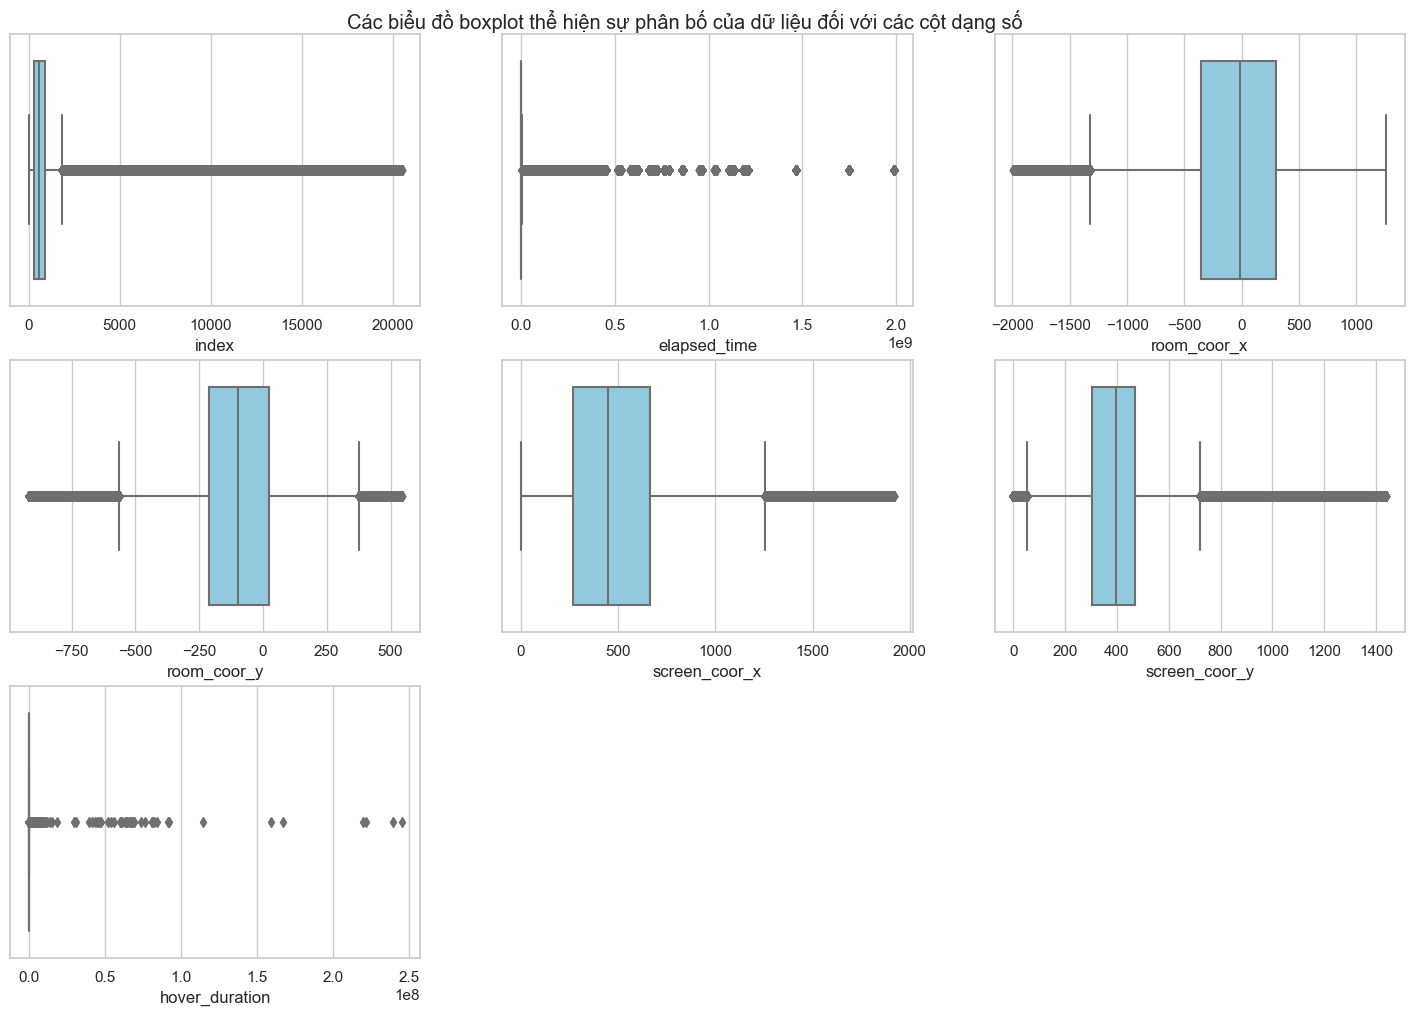

In [18]:
fig, axs = plt.subplots(3, 3, figsize = (18, 12))
row, col = 0, 0
for numerical_col in numerical_cols.drop(['session_id']):
  sns.boxplot(data = raw_train_df, x = numerical_col, color = 'skyblue', ax = axs[row, col])
  plt.grid()
  col += 1
  if col >= 3:
    col = 0
    row += 1
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
plt.suptitle('Các biểu đồ boxplot thể hiện sự phân bố của dữ liệu đối với các cột dạng số', y = 0.9)
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Hầu hết các cột của dữ liệu đều có xuất hiện outlier, một số cột có xuất hiện khá nhiều outlier như "index", "elapsed_time", "hover_duration" thì dữ liệu đều có xu hướng nghiêng nhiều về bên phải. Lấy ví dụ cột "hover_duration" cho ta biết được đa phần người học không mất nhiều thời gian cho các sự kiện hover, dễ thấy phần lớn dữ liệu tập trung nhiều ở phía bên trái biểu đồ, hay nói cách khác hầu hết người chơi di chuyển một số vật phẩm hoặc giao diện khác trong vòng chưa đầy 5000 ms.
- Cột "room_coor_x" có xuất hiện nhiều outlier ở phía bên trái cho thấy sự tương tác với các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trái màn hình room. Tương tự với cột "room_coor_y" có xuất hiện outlier ở cả phía bên trái và bên phải, điều này cho thấy các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trên và bên dưới màn hình room.
- Cột "screen_coor_x" có xuất hiện nhiều outlier ở phía bên phải cho thấy sự tương tác với các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên phải màn hình. Tương tự với cột "screen_coor_y" có xuất hiện nhiều outlier ở bên phải, điều này cho thấy các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên trên màn hình trò chơi.

Tiếp theo, ta sẽ dùng các biểu đồ tròn đối với các cột dạng phân loại (categorical) để thể hiện sự phân bố của dữ liệu, ở đây ta chỉ xét các cột "page", "fullscreen", "hq", "music", "level_group".

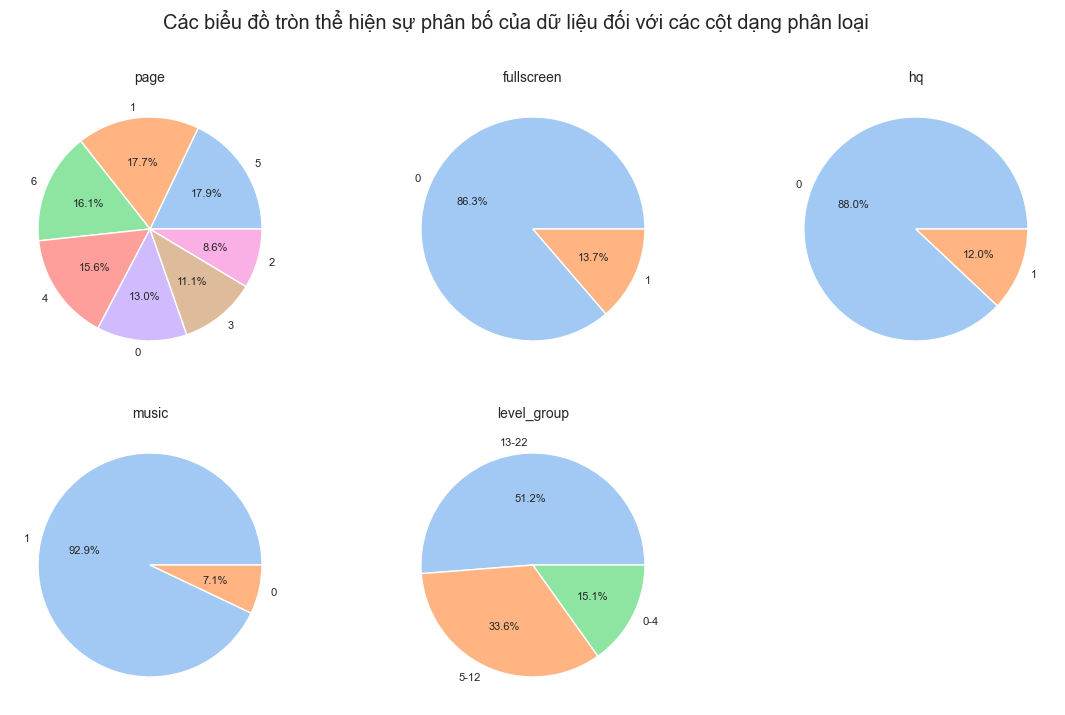

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (14, 8))
row, col = 0, 0
for categorical_col in raw_train_df.select_dtypes(include = 'category').columns.drop(['event_name', 'name', 'level']):
  axs[row, col].pie(raw_train_df[categorical_col].value_counts(), labels = raw_train_df[categorical_col].value_counts().index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%', textprops = {'fontsize': 8})
  axs[row, col].set_title(categorical_col, fontsize = 10)
  col += 1
  if col >= 3:
    col = 0
    row += 1
fig.delaxes(axs[1, 2])
plt.suptitle('Các biểu đồ tròn thể hiện sự phân bố của dữ liệu đối với các cột dạng phân loại')
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Đa số người học chọn không mở trò chơi ở chế độ toàn màn hình **(fullscreen)**, chiếm **~86.3%** và chọn không bật trò chơi ở chất lượng cao **(hq)**, chiếm **~88%**. Trong khi đó, đa số người học đều chọn mở nhạc của trò chơi **(music)** với tỉ lệ phần trăm khá cao, chiếm **~92.9%**. Điều này cũng dễ hiểu vì đa phần người học ở độ tuổi từ lớp 3-5, với những người ở độ tuổi thì âm nhạc có thể tạo được sự hứng thú trong quá trình chơi game, từ đó tăng thêm trải nghiệm tham gia trò chơi.
- Về sự phân bố các trang trong notebook **(page)** có thể thấy tỉ lệ phần trăm các trang trong dữ liệu được phân bố đều nhau, trong đó **~13%** thuộc page 0, **~17.7%** thuộc page 1, **~8.6%** thuộc page 2, **~11.1%** thuộc page 3, **~15.6%** thuộc page 4, **~17.9%** thuộc page 5 và **~16.1%** thuộc page 6.
- Về các nhóm level **(level_group)**, số lượng sự kiện trong nhóm level thứ ba (13-22) có tỉ lệ phần trăm cao nhất, chiếm **~51.2%**. Sau đó là nhóm level thứ hai (5-12), chiếm **~33.6%**. Cuối cùng là nhóm level thứ nhất (0-5), chiếm **~15.1%**, điều này cũng dễ hiểu vì các phân bố số lượng level trong từng nhóm level **(level_group)** là khác nhau dẫn đến số lượng sự kiện theo từng nhóm level là khác nhau, ví dụ nhóm level thứ nhất (0-4) có 5 level, nhóm level thứ hai (5-12) có 8 level và nhóm level thứ ba (13-22) có 10 level, do đó số lượng level trong từng nhóm level **(level_group)** càng nhiều thì tỉ lệ phần trăm càng cao. Hơn nữa việc hầu hết các câu hỏi đều thuộc từ level 13 đến level 22 vì chúng thách thức người chơi tìm ra các manh mối phức tạp hơn dẫn tới có nhiều sự kiện xảy ra ở đây hơn trong trò chơi.

Cuối cùng, ta sẽ dùng biểu đồ tròn đối để thể hiện sự phân bố của dữ liệu trong thuộc tính nhãn (được lấy từ cột "correct" của tập dữ liệu `raw_train_labels_df`). Trong đó:
- Màu xanh dương: thể hiện cho các câu trả lời đúng (1).
- Màu cam: thể hiện cho các câu trả lời sai (0).

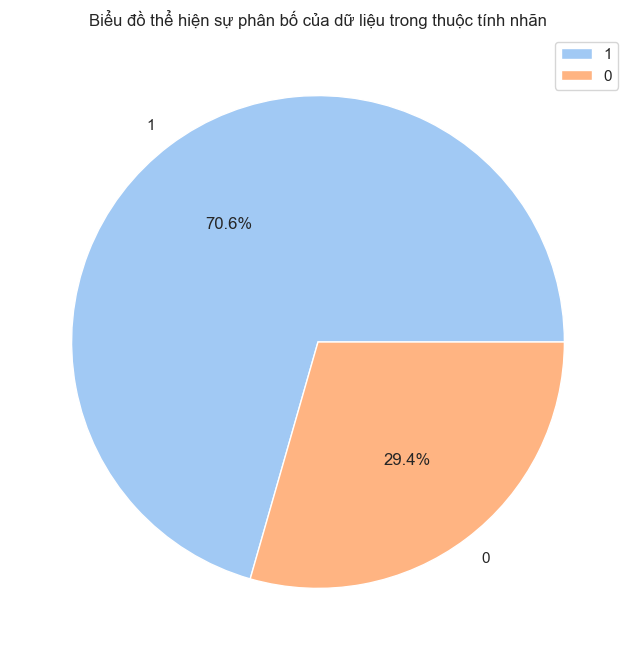

In [20]:
plt.figure(figsize = (12, 8))
plt.pie(raw_train_labels_df['correct'].value_counts(), labels = raw_train_labels_df['correct'].value_counts().index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện sự phân bố của dữ liệu trong thuộc tính nhãn')
plt.legend()
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy có **~70.6%** là câu trả lời đúng cho các câu hỏi được đưa ra, trong khi đó có **~29.4%** còn lại là câu trả lời sai. Điều này cho ta biết mức độ tập trung học tập của học sinh trong suốt quá trình chơi game ở mức ổn định, tức là học sinh có theo dõi và thu thập các thông tin từ những manh mối để trả lời câu hỏi, do đó tỉ lệ các câu trả lời đúng cao hơn.

Để đi vào chi tiết từng câu hỏi, ta sẽ dùng các biểu đồ cột để thể hiện sự phân bố của các câu trả lời cho từng câu hỏi được đưa ra. Trong đó:
- Trục hoành: thể hiện cho các loại câu trả lời (đúng - 1, sai - 0).
- Trục tung: thể hiện cho số lượng theo từng loại câu trả lời.
- Màu xanh: thể hiện cho câu trả lời sai (0).
- Màu cam: thể hiện cho câu trả lời đúng (1).

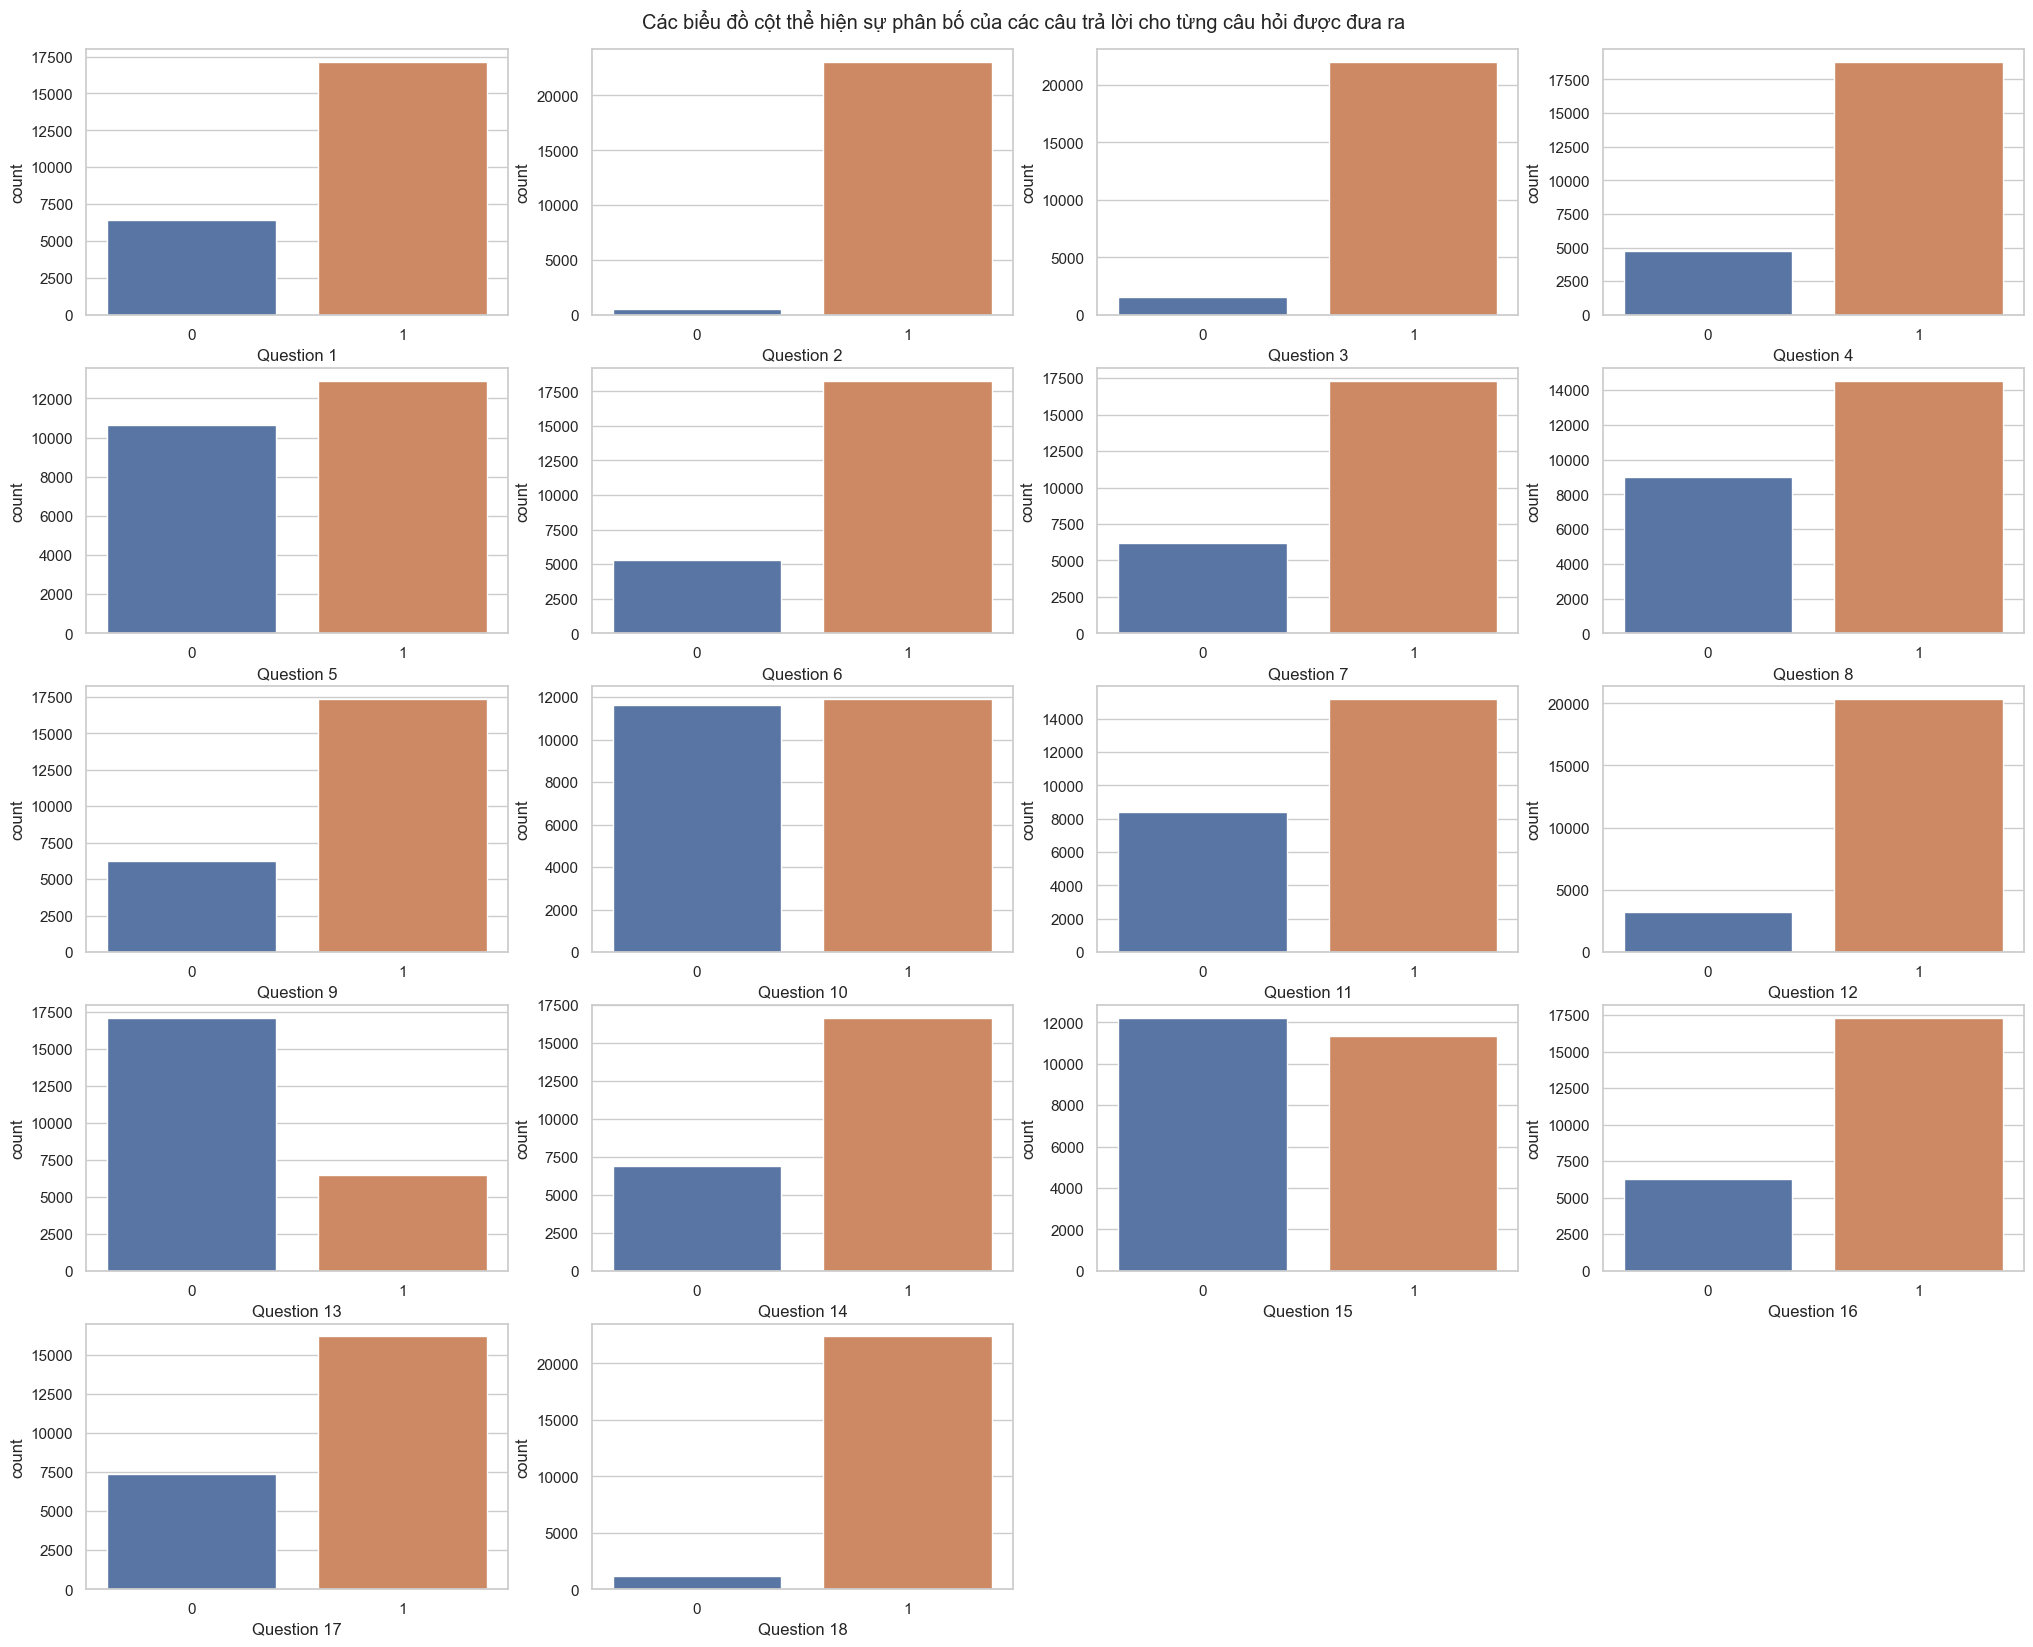

In [21]:
questions_train_labels = raw_train_labels_df['session_id'].apply(lambda x: int(x.split('_')[-1][1:]))
fig, axs = plt.subplots(5, 4, figsize = (25, 20))
row, col = 0, 0
for question in questions_train_labels.unique():
  question_train_labels_df = raw_train_labels_df.iloc[questions_train_labels[questions_train_labels == question].index]
  sns.countplot(data = question_train_labels_df, x = 'correct', ax = axs[row, col])
  axs[row, col].set_xlabel(f'Question {question}')
  col += 1
  if col >= 4:
    col = 0
    row += 1
fig.delaxes(axs[4, 3])
fig.delaxes(axs[4, 2])
plt.suptitle('Các biểu đồ cột thể hiện sự phân bố của các câu trả lời cho từng câu hỏi được đưa ra', y = 0.9)
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy trong các câu hỏi trên, chỉ có **câu hỏi 13 và câu hỏi 15** là học sinh trả lời sai nhiều hơn đúng. Trong khi ở **câu hỏi 5 và câu hỏi 10** học sinh lại có sự phân vân nên tỉ lệ số câu trả lời đúng gần như ngang bằng với số câu trả lời sai. Đối với các câu hỏi còn lại có số lượng câu trả lời đúng cao hơn nhiều so với câu trả lời sai.

### Người học sử dụng thời gian như thế nào theo từng nhóm level?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ đường để thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại **(elapsed_time)**.
- Trục hoành: index của các sự kiện trong cùng một session **(index)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

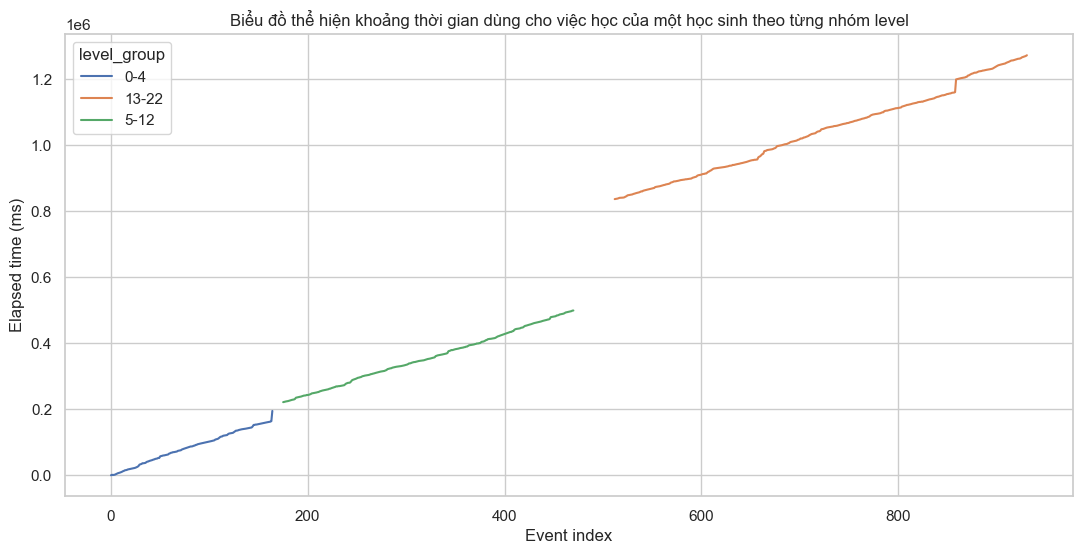

In [22]:
first_df = raw_train_df[raw_train_df['session_id'] == raw_train_df['session_id'].unique()[0]]
plt.figure(figsize = (13, 6))
sns.lineplot(data = first_df, x = 'index', y = 'elapsed_time', hue = 'level_group')
plt.xlabel('Event index')
plt.ylabel('Elapsed time (ms)')
plt.title('Biểu đồ thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy khoảng thời gian dùng cho việc học **tăng lên** theo từng level. Đặc biệt, ở phần chuyển tiếp giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22), khoảng cách về thời gian cao hơn so với nhóm level thứ 1 (0-4). Điều này có liên quan đến thời gian được sử dụng để trả lời các câu hỏi giữa mỗi phần, cụ thể các câu hỏi ở giữa nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) có phần dễ hơn nên người chơi thường sẽ không mất nhiều thời gian. Trong khi đó các câu hỏi ở giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22) có thể sẽ gây khó dễ cho người chơi nhiều hơn nên sẽ mất nhiều thời gian hơn.

### Cách điều khiển trong trò chơi có thuận tiện đối với học sinh hay không?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ scatter để thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_y)**.
- Trục hoành: tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

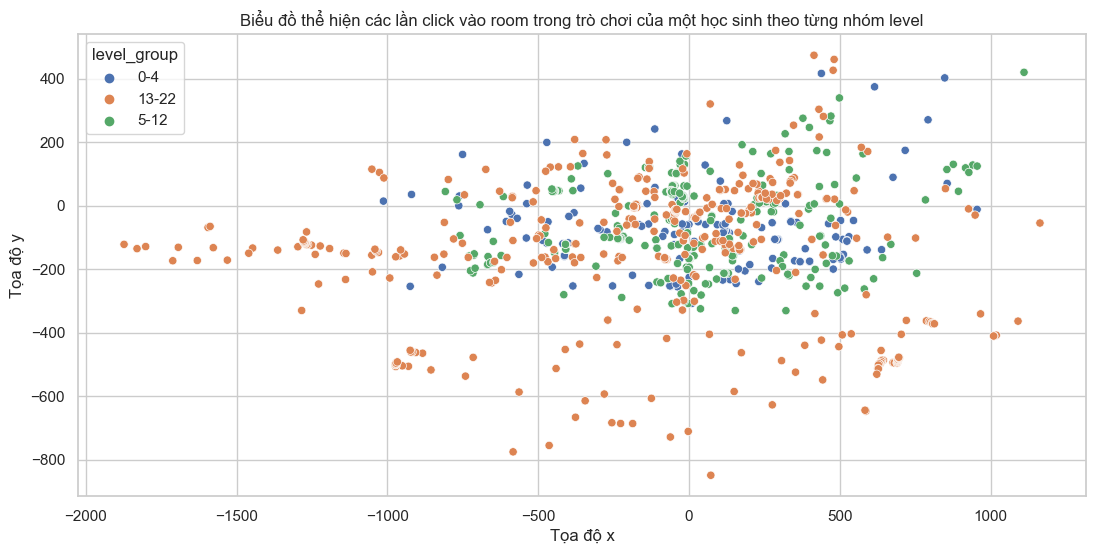

In [23]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'room_coor_x', y = 'room_coor_y', hue = 'level_group')
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy các lần click vào room trong trò chơi ở các nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) phân bố tập trung ở **trung tâm** màn hình hơn. Trong khi đó ở nhóm level thứ 3 (13-22), các lần click này lại tập trung nhiều vào ở **phần dưới và phần bên trái** màn hình hơn. Điều này có thể do mức độ khó của trò chơi ở 2 nhóm level ban đầu tập trung vào việc làm quen dần với cách điều khiển trò chơi nên phân bố các room ở 2 nhóm level ban đầu thường sẽ dễ phát hiện hơn. Trong khi đó ở nhóm level thứ 3 (13-22) thì độ khó của trò chơi được nâng lên vào có một số room được ẩn giấu để người chơi khó phát hiện, do vậy việc phân bố room ở **phần dưới và phần bên trái** màn hình trò chơi cũng là điều dễ hiểu.

Ta sẽ dùng thêm biểu đồ scatter để thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_y)**.
- Trục hoành: tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

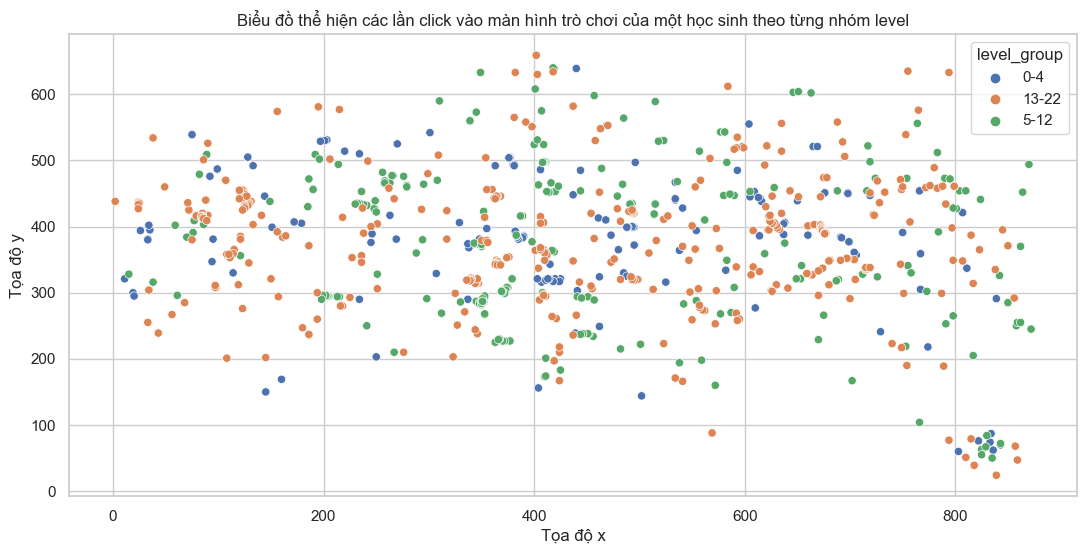

In [24]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'screen_coor_x', y = 'screen_coor_y', hue = 'level_group')
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy kích thước màn hình trò chơi chỉ có thể đạt tối đa **1919x1440**, các lần click vào màn hình trò chơi phân bố rải rác khắp nơi. Đồng thời có một số lượng nhỏ các lần click tập trung ở phía dưới bên phải màn hình, điều này cho thấy đây là vị trí của các nút bấm qua màn.

Ngoài ra, quan sát cả 2 biểu đồ trên ta thấy kích thước màn hình room có chứa giá trị âm còn kích thước màn hình trò chơi thì không, điều này có thể là do kích thước của màn hình trò chơi là cố định nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **góc dưới cùng bên trái** màn hình, còn kích thước của màn hình room luôn thay đổi khác nhau đối với các địa điểm khác nhau nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **chính giữa trung tâm** màn hình.

### Các hành vi tương tác qua các sự kiện có ảnh hưởng như thế nào?

Để trả lời cho câu hỏi này, ta cần có cái nhìn tổng quan về phân bố theo các loại sự kiện và theo tên sự kiện.

Đầu tiên, ta sẽ dùng biểu đồ cột để thể hiện phân bố số lượng các loại sự kiện theo từng nhóm level. Trong đó:
- Trục hoành: thể hiện các loại sự kiện **(event_name)**.
- Trục tung: thể hiện số lượng theo từng loại sự kiện.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

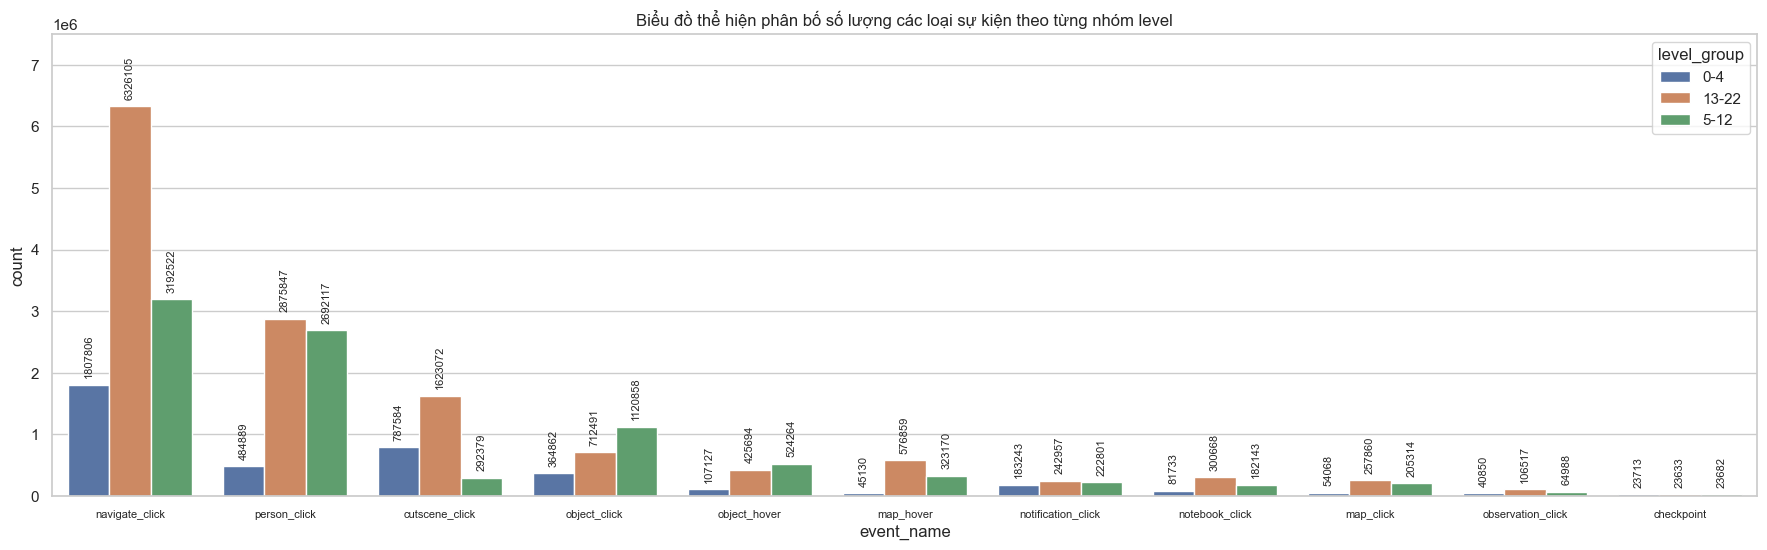

In [25]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.countplot(data = raw_train_df, x = 'event_name', hue = 'level_group', order = raw_train_df['event_name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax.bar_label(ax.containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[1], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[2], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
plt.ylim(0, 7.5e6)
plt.title('Biểu đồ thể hiện phân bố số lượng các loại sự kiện theo từng nhóm level')
plt.show()

Ở đây ta sẽ làm rõ ý nghĩa của từng loại sự kiện như sau:
- **checkpoint** - sự kiện chuyển sang chương mới, chỉ xuất hiện sau khi kết thúc một nhóm level
- **cutscene_click** - sự kiện click để nói chuyện với các nhân vật khác
- **map_click** - sự kiện click vào bản đồ (chỉ dành cho các sự kiện có liên quan đến bản đồ)
- **map_hover** - sự kiện hover vào bản đồ (chỉ dành cho các sự kiện có liên quan đến bản đồ)
- **navigate_click** - sự kiện click để điều hướng nhân vật người chơi (ví dụ: di chuyển nhân vật, thu thập manh mối, nói chuyện, ...)
- **notebook_click** - sự kiện click trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)
- **notification_click** - sự kiện click đưa ra các thông báo cho người chơi
- **object_click** - sự kiện click vào các manh mối trong trò chơi
- **object_hover** - sự kiện hover vào các manh mối trong trò chơi
- **observation_click** - sự kiện click vào các đồ vật khác để tìm ra một số manh mối
- **person_click** - sự kiện click vào các nhân vật khác, có liên quan đến hướng dẫn người chơi hoặc giao nhiệm vụ

**Nhận xét:** Quan sát biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Phân bố của sự kiện **navigate_click** chiếm nhiều nhất (trong đó **1,807,806** mẫu thuộc nhóm level thứ nhất (0-4), **3,192,522** mẫu thuộc nhóm level thứ hai (5-12) và **6,326,105** mẫu thuộc nhóm level thứ ba (13-22)), trong khi đó phân bố của sự kiện **checkpoint** chiếm ít nhất (trong đó **23,713** mẫu thuộc nhóm level thứ nhất (0-4), **23,682** mẫu thuộc nhóm level thứ hai (5-12) và **23,633** mẫu thuộc nhóm level thứ ba (13-22)). Điều này cho thấy hầu hết các học sinh chơi game chủ yếu sử dụng sự kiện **navigate_click** để điều hướng nhân vật người chơi, thu thập đồ vật nhằm tìm kiếm manh mối hoặc nói chuyện với các nhân vật khác có mặt trong trò chơi, do vậy số lượng sự kiện **navigate_click** chiếm nhiều nhất. Ngoài ra, sự kiện **checkpoint** chỉ xuất hiện sau khi kết thúc một nhóm level và chuyển sang chương mới, do vậy số lượng sự kiện **checkpoint** chiếm ít nhất.
- Về phân bố theo nhóm level của các sự kiện, trong đó nhóm level thứ hai (5-12) chiếm tỉ lệ cao nhất ở một số sự kiện như "object_click", "object_hover", các sự kiện còn lại thì nhóm level thứ ba (13-22) luôn chiếm tỉ lệ cao nhất, sau đó tới nhóm level thứ hai (5-12) và cuối cùng là nhóm level thứ nhất (0-4). Lí do tương tự như trên, vì số lượng các level trong từng nhóm khác nhau ít nhiều dẫn tới số lượng sự kiện trong từng nhóm cũng có sự chênh lệch.

Tiếp theo, ta sẽ dùng biểu đồ cột để thể hiện phân bố số lượng tên sự kiện theo từng nhóm level. Trong đó:
- Trục hoành: thể hiện tên sự kiện **(name)**.
- Trục tung: thể hiện số lượng theo từng tên sự kiện.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

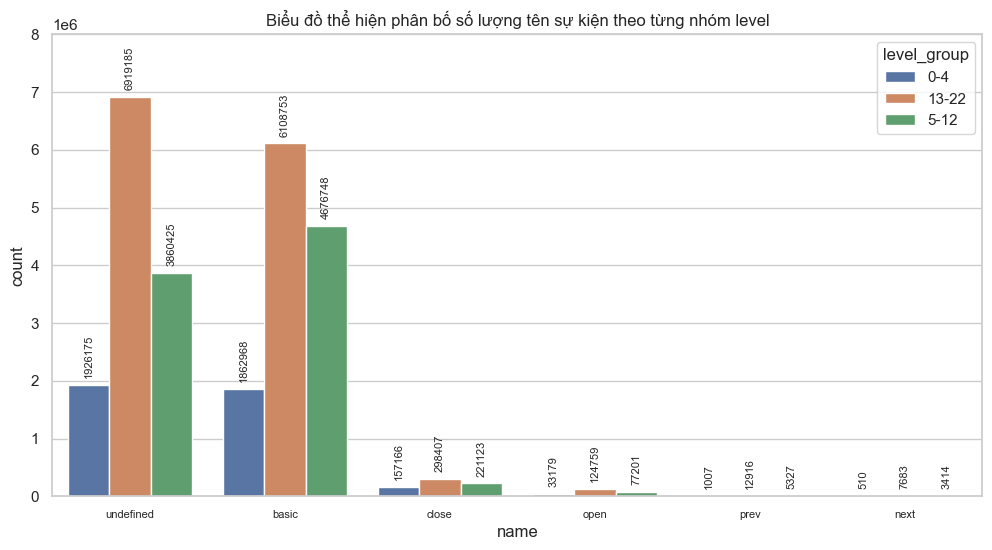

In [26]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(data = raw_train_df, x = 'name', hue = 'level_group', order = raw_train_df['name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax.bar_label(ax.containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[1], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[2], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
plt.ylim(0, 8e6)
plt.title('Biểu đồ thể hiện phân bố số lượng tên sự kiện theo từng nhóm level')
plt.show()

Ở đây ta sẽ làm rõ ý nghĩa của từng tên sự kiện như sau:
- **basic** - các sự kiện cơ bản
- **undefined** - các sự kiện không xác định
- **close** - các sự kiện đóng (ví dụ: đóng notebook, đóng bản đồ, ...)
- **open** - các sự kiện mở (ví dụ: mở notebook)
- **prev** - các sự kiện chuyển về trang trước đó trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)
- **next** - các sự kiện chuyển sang trang tiếp theo trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)

**Nhận xét:** Quan sát biểu đồ trên, ta nhận thấy rằng phân bố của sự kiện không xác định "undefined" chiếm nhiều nhất so với các sự kiện còn lại. Nói cách khác, sự kiện "undefined" có khoảng **12,705,785** mẫu, sự kiện "basic" có khoảng **12,648,469** mẫu, sự kiện "close" có khoảng **676,696** mẫu, sự kiện "open" có khoảng **235,139** mẫu, sự kiện "prev" có khoảng **19,250** mẫu và sự kiện chiếm ít nhất là sự kiện "next" có khoảng **11,607** mẫu. Điều này cho thấy có khá nhiều sự kiện không xác định được khi học sinh điều hướng trong trò chơi, trong khi việc đóng mở sẽ xảy ra thường xuyên khi tương tác với notebook hoặc bản đồ, cuối cùng là các sự kiện "prev" và "next" hiếm khi xảy ra, vì hầu hết học sinh không hoàn thành hết các chương trong trò chơi.

Cuối cùng, ta sẽ dùng các biểu đồ cột cho từng loại sự kiện trên để thể hiện sự phân bố theo level. Trong đó:
- Trục hoành: thể hiện các level xảy ra của sự kiện **(level)**.
- Trục tung: thể hiện số lượng theo từng level.

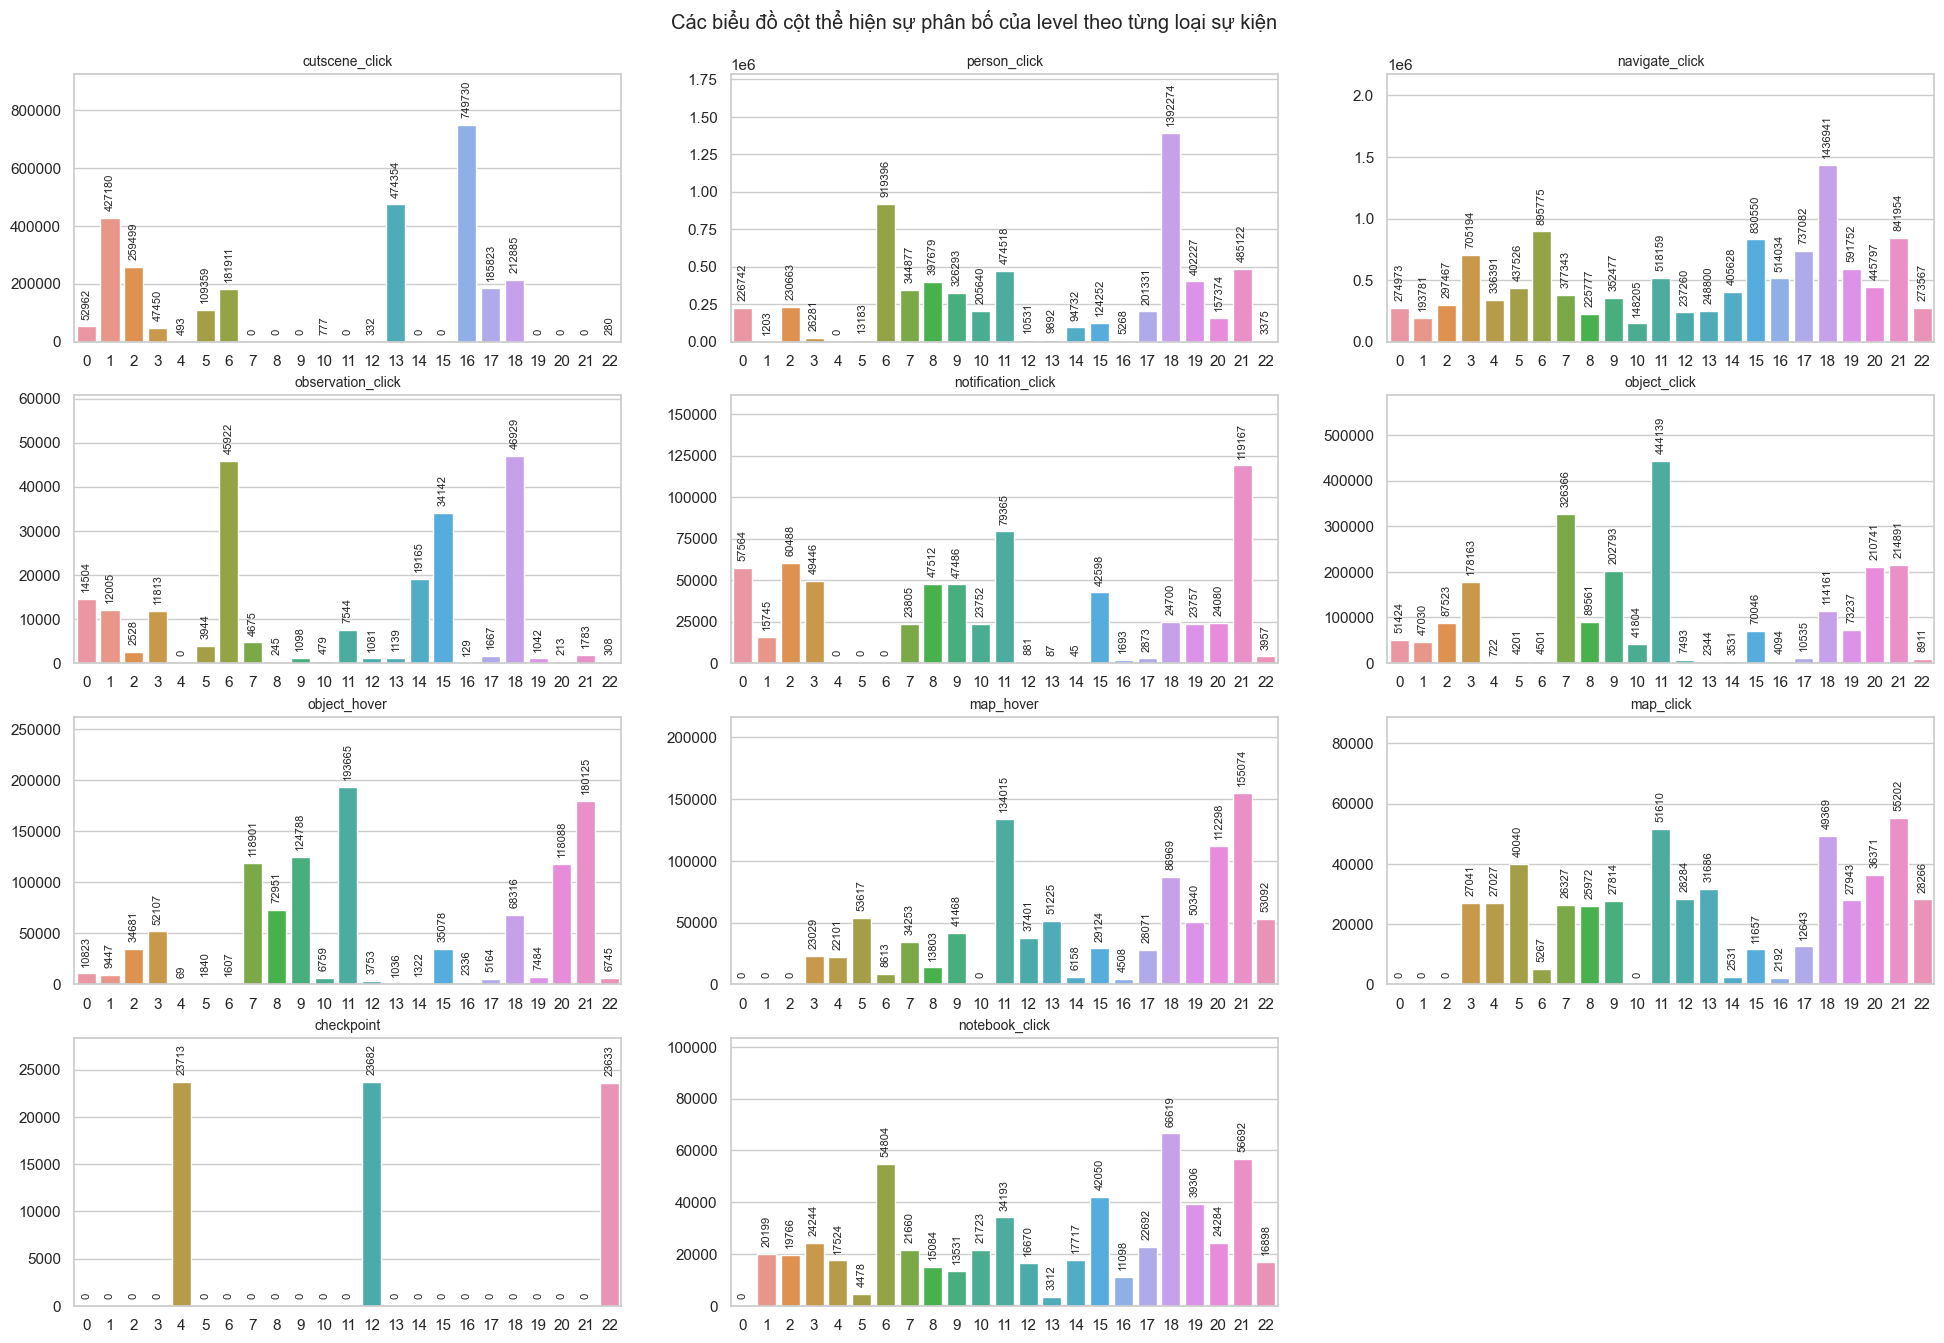

In [27]:
fig, axs = plt.subplots(4, 3, figsize = (24, 16))
row, col = 0, 0
for event_name in categorical_col_df['unique']['event_name']:
  event_df = raw_train_df[raw_train_df['event_name'] == event_name]
  sns.countplot(data = event_df, x = 'level', ax = axs[row, col])
  axs[row, col].set_xlabel('')
  axs[row, col].set_ylabel('')
  axs[row, col].set_title(event_name, fontsize = 10)
  axs[row, col].bar_label(axs[row, col].containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
  axs[row, col].set_ylim(0, event_df['level'].value_counts().values[0] + np.mean(event_df['level'].value_counts().values) * 1.5)
  col += 1
  if col >= 3:
    col = 0
    row += 1
plt.suptitle('Các biểu đồ cột thể hiện sự phân bố của level theo từng loại sự kiện', y = 0.92)
fig.delaxes(axs[3, 2])
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Các sự kiện có liên quan đến bản đồ như "map_hover" và "map_click" không có ý nghĩa đối với 3 mức level đầu tiên (0-1-2). Điều này cho thấy ở 3 level đầu tiên, người chơi chưa cần sử dụng tới công cụ này hoặc chưa mở khóa được công cụ này, bắt đầu từ level 4 trở đi (cũng chính là level cuối của nhóm level thứ nhất (0-4)), người chơi mới được mở rộng các địa điểm khám phá khác và lúc này công cụ bản đồ mới thực sự được cần quan tâm tới.
- Sự kiện "checkpoint" chỉ có xuất hiện giá trị ở level 4, level 12 và level 22. Điều này cũng dễ hiểu vì các sự kiện này chỉ xuất hiện sau khi kết thúc một nhóm level, tức là tương ứng với level 4 là level cuối cùng của nhóm level thứ nhất (0-4), tương ứng với level 12 là level cuối cùng của nhóm level thứ hai (5-12) và tương ứng với level 22 là level cuối cùng của nhóm level thứ ba (13-22). Ngoài ra về phân bố số lượng của level theo sự kiện "checkpoint" cũng khá đều ở 3 level trên (khoảng **~23,000** mẫu)
- Hầu hết sự kiện "navigate_click" xảy ra xuyên suốt trò chơi, do vậy phân bố số lượng của level theo sự kiện này cũng trải đều ở các level trò chơi. Level có nhiều sự kiện nhất theo từng loại sự kiện là: "cutscene_click" có **749,730** mẫu thuộc level 16, "person_click" có **1,392,274** mẫu thuộc level 18, "navigate_click" có **1,436,941** mẫu thuộc level 18, "observation_click" có **46,929** mẫu thuộc level 18, "notification_click" có **119,167** mẫu thuộc level 21, "object_click" có **444,139** mẫu thuộc level 11, "object_hover" có **193,665** mẫu thuộc level 11, "map_hover" có **155,074** mẫu thuộc level 21, "map_click" có **55,202** mẫu thuộc level 21, "notebook_click" có **66,619** mẫu thuộc level 18. Như vậy level 18 có lẽ là một level khó đối với hầu hết người chơi, dẫn tới các sự kiện xảy ra ở level này xuất hiện khá nhiều.
- Ở 3 mức level 4-5-6, các sự kiện như "notification_click", "object_click", "object_hover" thường không có giá trị hoặc số lượng giá trị ít, có thể trọng tâm ở các level này không phải tương tác với các sự kiện liên quan tới đồ vật hoặc những thứ tương tự.

### Các insight về tập dữ liệu

Từ các khám phá và phân tích về tập dữ liệu ở trên, ta có thể rút ra được các kết luận tổng quan như sau:
- Bằng hình thức giáo dục theo kiểu trò chơi trực tuyến như trên, người học thường không mất quá nhiều thời gian để tham gia mà vẫn đảm bảo cung cấp đủ lượng kiến thức cần thiết. Việc này đòi hỏi người học cần phải tập trung theo dõi từng chi tiết của trò chơi mới đạt hiệu suất học tập cao, tuy nhiên hầu hết lại không có quá nhiều học sinh hoàn thành hết toàn bộ các chương của trò chơi.
- Việc tương tác với trò chơi cũng nên được đơn giản hóa cho người học, đơn giản vì đối tượng người học ở đây hầu hết là những đứa trẻ từ lớp 3-5.
- Các manh mối của trò chơi nên bắt đầu từ mức độ dễ lồng ghép với sự hướng dẫn từ các nhân vật trò chơi, người học mới có thể làm quen dần với cách chơi và cách điều khiển. Sau đó có thể nâng độ khó của trò chơi lên để tạo sự thách thức. Ngoài ra, sau mỗi hành trình khám phá ở một địa điểm nào đó, cần cho người học kiểm tra lại những kiến thức đã thu thập được bằng một số câu hỏi ngắn, từ đó mới đánh giá đúng đắn về hiệu suất học tập của học sinh.
- Để tăng thêm trải nghiệm của người học, trò chơi nên được bố trí thêm nhạc nền, âm thanh, tiếng động,... đồ họa hay kích thước màn hình trò chơi cũng là một yếu tố phụ giúp tăng thêm trải nghiệm trò chơi, tuy nhiên không được quá chú trọng.

## E. RÚT TRÍCH ĐẶC TRƯNG

### Xử lý tình trạng khuyết dữ liệu (Missing data)

Trước tiên, ta sẽ tạo lại bảng thống kê mô tả về giá trị bị thiếu của các đặc trưng ở trên. Với mỗi cột, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100). Sau đó ta sẽ lưu các giá trị này vào dataframe `col_df` thành 2 dòng là "num_missing_val", "ratio_missing_val".

In [28]:
col_df = raw_train_df.agg([num_missing_val, ratio_missing_val]).T
col_df['num_missing_val'] = col_df['num_missing_val'].astype(int)
col_df

,num_missing_val,ratio_missing_val
session_id,0,0.000000
index,0,0.000000
elapsed_time,0,0.000000
event_name,0,0.000000
name,0,0.000000
level,0,0.000000
page,25732402,97.853196
room_coor_x,2073272,7.884079
room_coor_y,2073272,7.884079
screen_coor_x,2073272,7.884079


Như đã nói ở trên, các lí do mà các cột "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", "text", "fqid", "text_fqid" bị thiếu giá trị là:
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") và sự kiện "checkpoint" thì các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" thường bị thiếu chung với nhau.
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") thì cột "hover_duration" không bao giờ bị thiếu giá trị.
- Sự kiện liên quan tới notebook (như "notebook_click") thì cột "page" không bao giờ bị thiếu giá trị.
- Các sự kiện như "cutscene_click", "notification_click", "observation_click", "person_click" thì các cột "text" và "text_fqid" thường không bị thiếu hoặc tỉ lệ giá trị bị thiếu khá ít.

Nếu ta chọn cách thay thế hoặc bỏ đi các giá trị bị thiếu sẽ làm mất đi ý nghĩa phụ thuộc của các cột. Như vậy, ta sẽ không làm gì ở bước tiền xử lý giá trị bị thiếu này.

### Tạo các đặc trưng mới từ việc kết hợp các thuộc tính tiềm năng (Feature engineering)

Đầu tiên, đối với tập dữ liệu `raw_train_df`, ta sẽ thực hiện việc nhóm 2 cột "session_id" và "level_group" lại để tính các đặc trưng theo nhóm level. Ở đây ta sẽ lần lượt thực hiện các bước sau:
- Đối với một số cột dạng phân loại như "event_name", "fqid", "room_fqid", "text_fqid", ta sẽ tính số lượng các giá trị phân biệt (**nunique**) được nhóm theo từng "session_id" và "level_group", sau đó tạo ra các đặc trưng mới có tên cột + '_nunique' theo sau.
- Đối với một số cột dạng số như "elapsed_time", "level", "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", ta sẽ tính giá trị trung bình (**mean**) và độ lệch chuẩn (**std**) được nhóm theo từng "session_id" và "level_group", sau đó tạo ra các đặc trưng mới có tên cột + '_mean' và tên cột + '_std' theo sau.
- Tiếp theo, ta cần tính một số đặc trưng có liên quan đến "elapsed_time" như sau:
  - "total_time_spent": thể hiện chính xác khoảng thời gian trôi qua theo từng nhóm level.
  - "action_per_level": thể hiện số lượng sự kiện xuất hiện trong một nhóm level, được trích xuất từ cột "index".
  - "average_time_spent": thể hiện giá trị trung bình khoảng thời gian trôi qua theo từng nhóm level, được kết hợp từ 2 cột "total_time_spent" và "action_per_level".
- Cuối cùng, ta sẽ điền giá trị -1 vào các ô bị thiếu giá trị và tách cột "level_group" ra khỏi cột index.

Ta sẽ tạo hàm `feature_engineer()` để có thể sử dụng lại các tác vụ tiền xử lý khám phá đặc trưng sau này. Sau khi thực hiện tiền xử lý khám phá đặc trưng, ta sẽ gán vào dataframe mới `train_df`.

In [29]:
# Định nghĩa các cột dạng phân loại, các cột dạng số và tên các sự kiện
feature_categorical_cols = ['event_name', 'name', 'fqid', 'room_fqid', 'text', 'text_fqid']
feature_numerical_cols = ['elapsed_time', 'level', 'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']
feature_event_cols = ['cutscene_click', 'map_click', 'map_hover', 'navigate_click', 'notebook_click', 'notification_click', 'object_click', 'object_hover', 'observation_click', 'person_click']

def feature_engineer(df):
  new_df = []

  # Chuyển đổi kiểu dữ liệu của "level" và "page" từ dạng phân loại thành dạng số
  df['level'] = pd.to_numeric(df['level'])
  df['page'] = pd.to_numeric(df['page'])
  group_df = df.groupby(['session_id', 'level_group'])

  # Tạo ra các đặc trưng theo số lượng các giá trị phân biệt
  for col in feature_categorical_cols:
    temp = group_df[col].agg('nunique')
    temp.name = temp.name + '_nunique'
    new_df.append(temp)

  # Tạo ra các đặc trưng theo giá trị trung bình và độ lệch chuẩn
  for col in feature_numerical_cols:
    temp = group_df[col].agg('mean')
    temp.name = temp.name + '_mean'
    new_df.append(temp)
  for col in feature_numerical_cols:
    temp = group_df[col].agg('std')
    temp.name = temp.name + '_std'
    new_df.append(temp)

  # Tạo ra các đặc trưng về sự kiện để tính tổng số lượng
  # dummies_event_name_df = pd.concat([df, pd.get_dummies(df['event_name'])], axis = 1)
  # for col in feature_event_cols + ['elapsed_time']:
  #   temp = dummies_event_name_df.groupby(['session_id', 'level_group'])[col].agg('sum')
  #   temp.name = temp.name + '_sum'
  #   new_df.append(temp)

  # Tạo ra các đặc trưng có liên quan đến "elapsed_time"
  total_time_spent_df = group_df['elapsed_time'].apply(lambda x: x.max() - x.min())
  total_time_spent_df.name = 'total_time_spent'
  new_df.append(total_time_spent_df)

  total_action_count_df = group_df['index'].apply(lambda x: len(x))
  total_action_count_df.name = 'total_action_count'
  new_df.append(total_action_count_df)

  average_time_spent = total_time_spent_df / total_action_count_df
  average_time_spent.name = 'average_time_spent'
  new_df.append(average_time_spent)


  # Xử lý giá trị bị thiếu và loại bỏ "level_group" làm cột index
  new_df = pd.concat(new_df, axis = 1)
  new_df = new_df.fillna(-1)
  new_df = new_df.reset_index()
  new_df = new_df.set_index('session_id')

  return new_df

train_df = feature_engineer(raw_train_df)
train_df.head()

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_nunique,text_fqid_nunique,elapsed_time_mean,level_mean,page_mean,...,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std,total_time_spent,total_action_count,average_time_spent
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,56,17,85793.557576,1.945455,-1.000000,...,1.230975,-1.000000,399.296040,129.292411,214.871000,104.082743,3227.370757,194860,165,1180.969697
20090312431273200,13-22,10,3,49,12,168,35,1040600.766667,17.402381,-1.000000,...,2.358652,-1.000000,622.061375,230.370874,240.280218,99.067861,1305.088265,435947,420,1037.969048
20090312431273200,5-12,10,3,39,11,124,24,357205.189189,8.054054,-1.000000,...,2.096919,-1.000000,357.227700,137.409476,203.268560,120.255453,1316.408315,277750,296,938.344595
20090312433251036,0-4,11,4,22,6,49,11,97633.417266,1.870504,0.000000,...,1.232616,0.000000,445.980040,156.186242,252.554707,121.062929,2114.876406,233752,139,1681.669065
20090312433251036,13-22,11,6,73,16,183,43,2498852.222822,17.762529,5.100000,...,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518,2638851,1297,2034.580571


In [30]:
print(train_df.shape)

(70686, 26)


Sau khi tiền xử lý khám phá đặc trưng, kích thước của dữ liệu mới đã thay đổi còn **70,686 dòng x 26 cột**

Tiếp theo, đối với tập dữ liệu `raw_train_labels_df`, ta sẽ tạo ra thêm 2 cột thuộc tính mới như sau:
- "session": thể hiện id của session sự kiện xảy ra, được lấy từ cột "session_id".
- "question": thể hiện câu hỏi tương ứng với id của session đó, các câu hỏi từ 1 đến 18.

Sau khi thực hiện tiền xử lý khám phá đặc trưng, ta sẽ gán vào dataframe mới `train_labels_df`.

In [31]:
train_labels_df = raw_train_labels_df.copy()
train_labels_df['session'] = train_labels_df['session_id'].apply(lambda id: int(id.split('_q')[0]))
train_labels_df['question'] = train_labels_df['session_id'].apply(lambda id: int(id.split('_q')[1]))
train_labels_df.head()

,session_id,correct,session,question
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


### Số hóa giá trị thuộc tính (Feature encoding)

Đầu tiên, ta cần xem xét lại kiểu dữ liệu của các cột trong tập dữ liệu mới `train_df`.

In [32]:
train_df.dtypes

level_group            category
event_name_nunique        int64
name_nunique              int64
fqid_nunique              int64
room_fqid_nunique         int64
text_nunique              int64
text_fqid_nunique         int64
elapsed_time_mean       float64
level_mean              float64
page_mean               float64
room_coor_x_mean        float64
room_coor_y_mean        float64
screen_coor_x_mean      float64
screen_coor_y_mean      float64
hover_duration_mean     float64
elapsed_time_std        float64
level_std               float64
page_std                float64
room_coor_x_std         float64
room_coor_y_std         float64
screen_coor_x_std       float64
screen_coor_y_std       float64
hover_duration_std      float64
total_time_spent          int64
total_action_count        int64
average_time_spent      float64
dtype: object

Ở đây, ta chỉ thấy có mỗi cột "level_group" đang có kiểu dữ liệu `category`. Để hoàn thiện quá trình biến dữ liệu dạng phân loại về dạng số phù hợp cho các mô hình học máy, ta cần mã hóa cột này bằng phương pháp Label Encoding như sau:
- "0-4": thay thế bằng giá trị 0
- "5-12": thay thế bằng giá trị 1
- "13-22": thay thế bằng giá trị 2

Đồng thời ta cũng cần thay đổi kiểu dữ liệu của cột "level_group" thành kiểu dữ liệu `int`. Tương tự như trên, ta cũng sẽ tạo hàm `feature_encoding()` để có thể sử dụng lại các tác vụ tiền xử lý số hóa giá trị thuộc tính sau này. 

In [33]:
def feature_encoding(df):
  df['level_group'] = df['level_group'].replace({ '0-4': 0, '5-12': 1, '13-22': 2 })
  df['level_group'] = pd.to_numeric(df['level_group'])

  return df

train_df = feature_encoding(train_df)

In [34]:
train_df.head()

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_nunique,text_fqid_nunique,elapsed_time_mean,level_mean,page_mean,...,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std,total_time_spent,total_action_count,average_time_spent
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0,10,3,30,7,56,17,85793.557576,1.945455,-1.000000,...,1.230975,-1.000000,399.296040,129.292411,214.871000,104.082743,3227.370757,194860,165,1180.969697
20090312431273200,2,10,3,49,12,168,35,1040600.766667,17.402381,-1.000000,...,2.358652,-1.000000,622.061375,230.370874,240.280218,99.067861,1305.088265,435947,420,1037.969048
20090312431273200,1,10,3,39,11,124,24,357205.189189,8.054054,-1.000000,...,2.096919,-1.000000,357.227700,137.409476,203.268560,120.255453,1316.408315,277750,296,938.344595
20090312433251036,0,11,4,22,6,49,11,97633.417266,1.870504,0.000000,...,1.232616,0.000000,445.980040,156.186242,252.554707,121.062929,2114.876406,233752,139,1681.669065
20090312433251036,2,11,6,73,16,183,43,2498852.222822,17.762529,5.100000,...,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518,2638851,1297,2034.580571


Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý mã hóa đặc trưng.

In [35]:
train_df.dtypes

level_group              int64
event_name_nunique       int64
name_nunique             int64
fqid_nunique             int64
room_fqid_nunique        int64
text_nunique             int64
text_fqid_nunique        int64
elapsed_time_mean      float64
level_mean             float64
page_mean              float64
room_coor_x_mean       float64
room_coor_y_mean       float64
screen_coor_x_mean     float64
screen_coor_y_mean     float64
hover_duration_mean    float64
elapsed_time_std       float64
level_std              float64
page_std               float64
room_coor_x_std        float64
room_coor_y_std        float64
screen_coor_x_std      float64
screen_coor_y_std      float64
hover_duration_std     float64
total_time_spent         int64
total_action_count       int64
average_time_spent     float64
dtype: object

Như vậy có thể thấy, tất cả các cột dữ liệu đã được đưa về dạng số.

### Trích xuất đặc trưng (Feature selection)

Đầu tiên, ta sẽ vẽ biểu đồ heatmap để thể hiện sự phụ thuộc và tương quan giữa các trường trong dữ liệu. Trong đó:
- Mỗi màu sắc càng nhạt sẽ thể hiện độ tương quan nghịch càng mạnh (càng gần giá trị -1).
- Mỗi màu sắc càng đậm sẽ thể hiện độ tương quan thuận càng mạnh (càng gần giá trị 1).
- Mỗi màu sắc trung gian sẽ thể hiện độ tương quan yếu (càng gần giá trị 0).

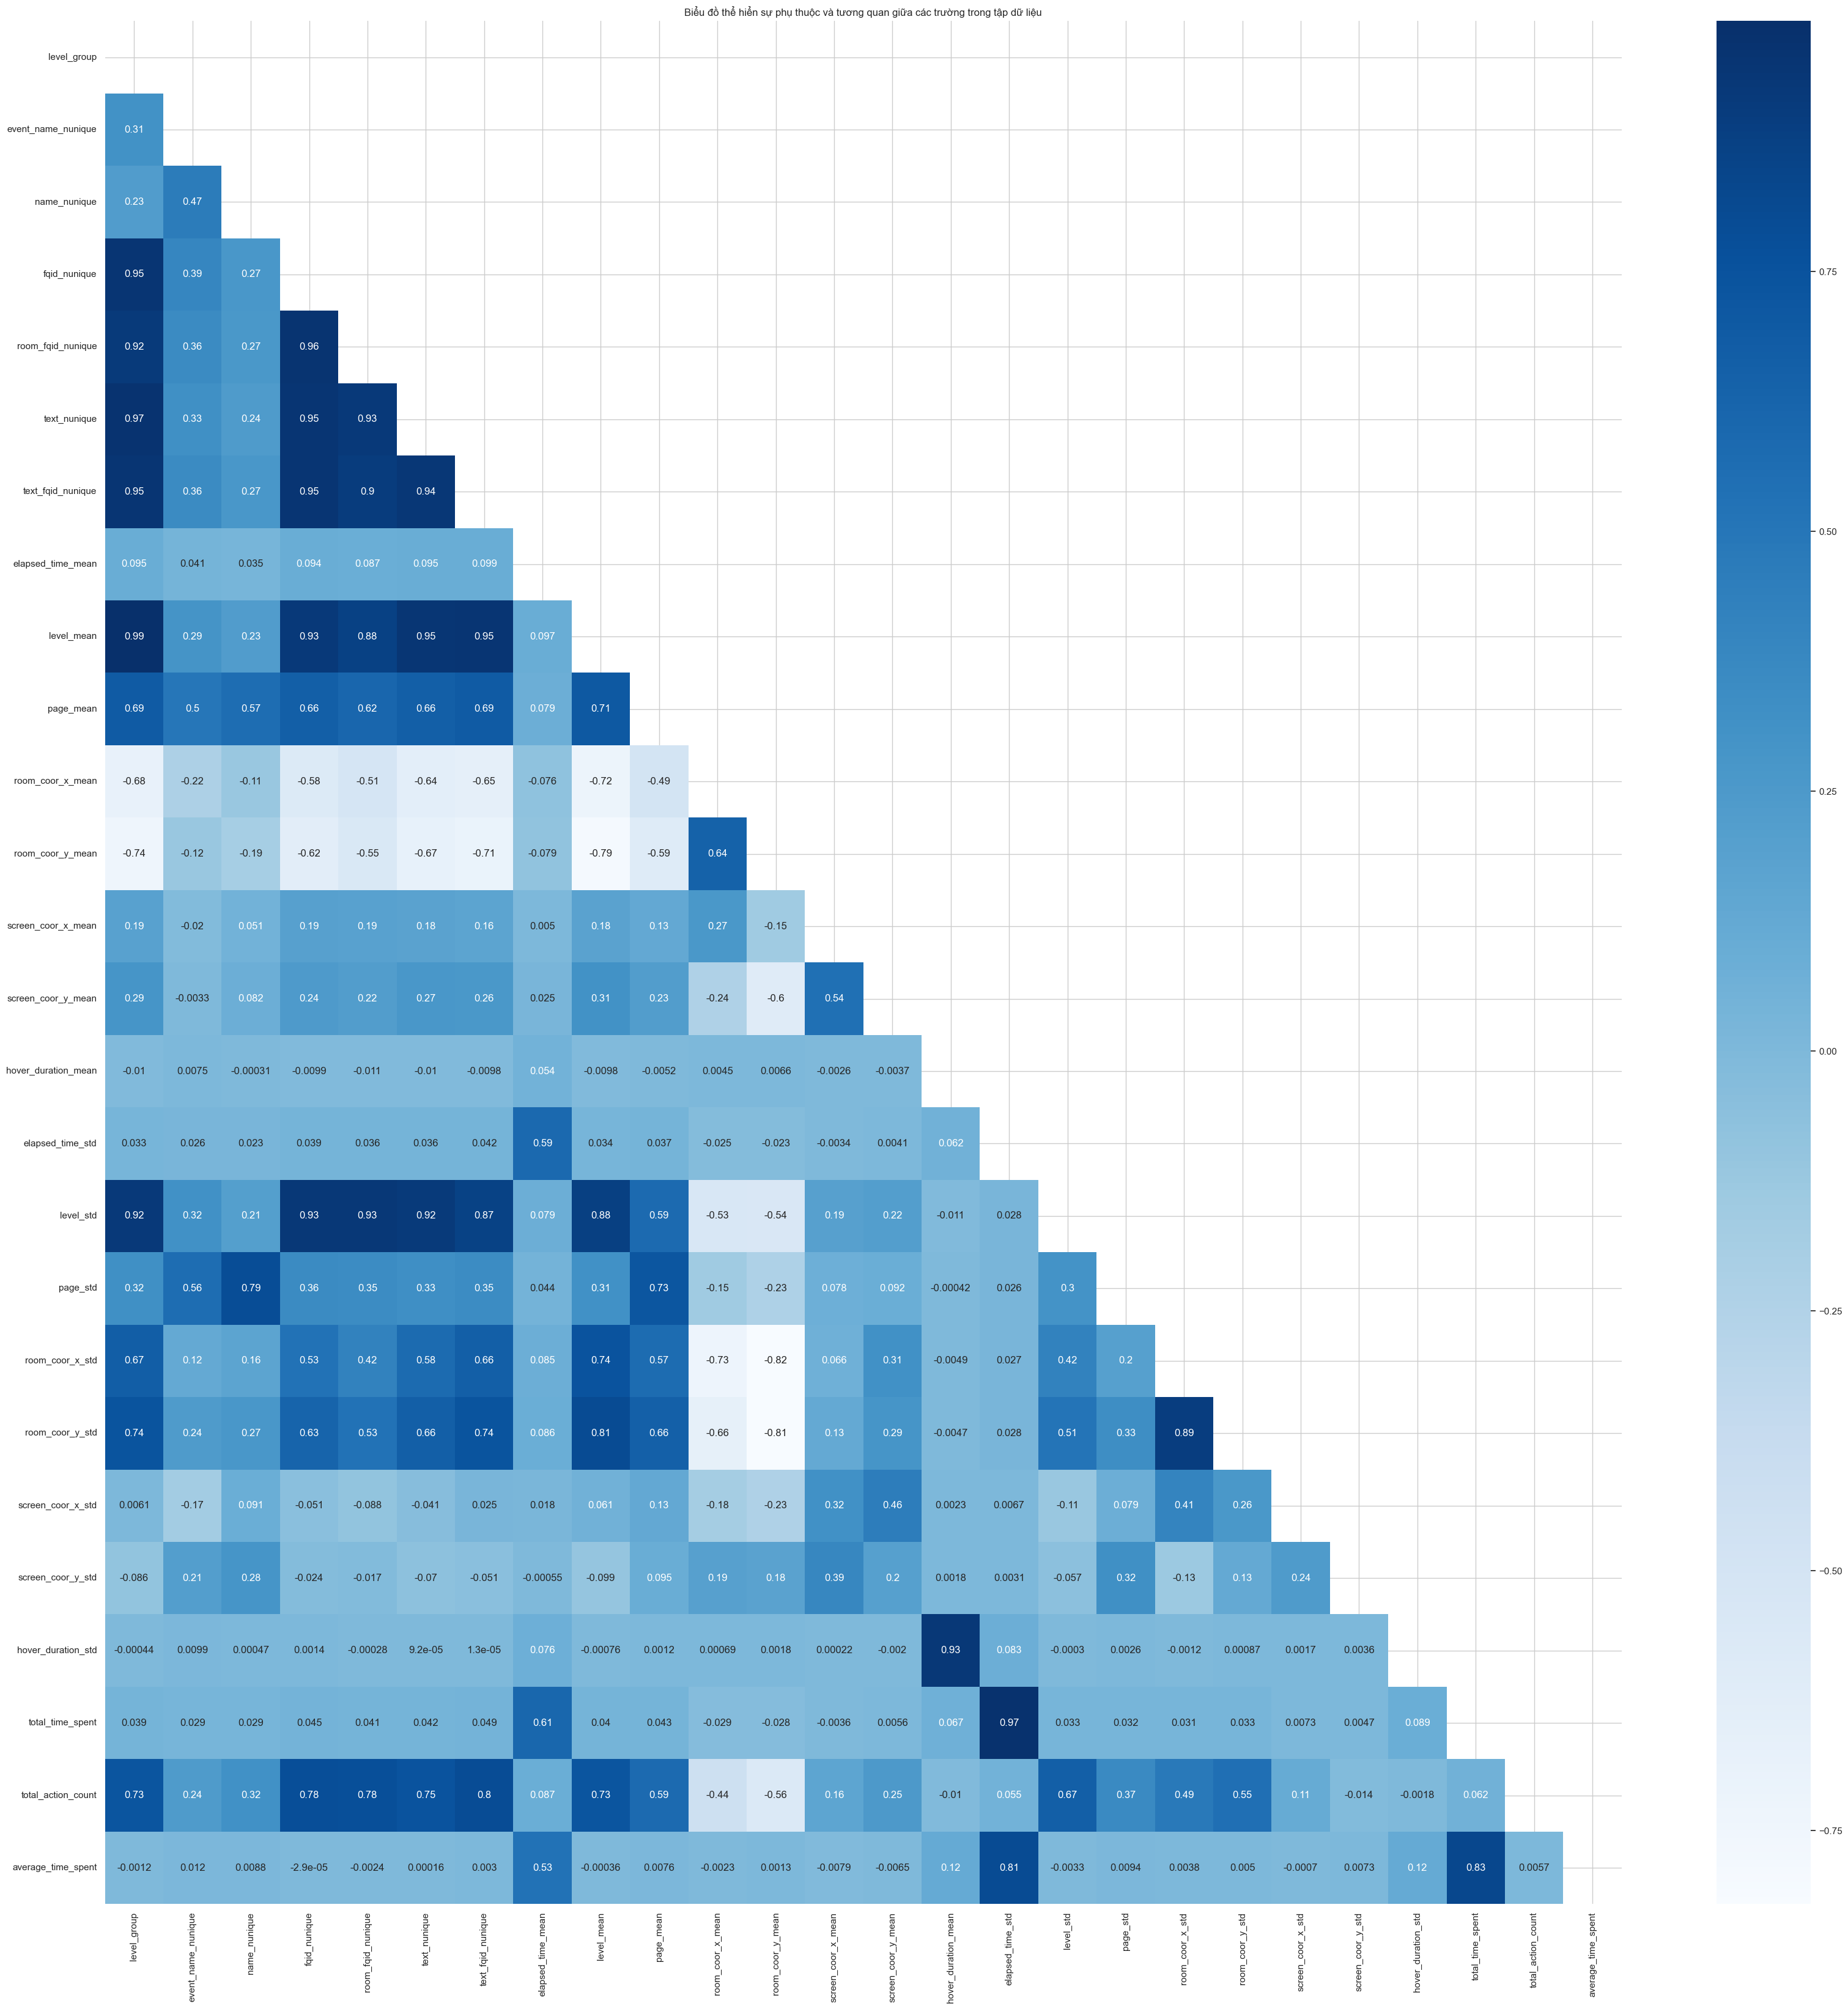

In [36]:
plt.figure(figsize = (40, 40))
mask = np.triu(np.ones_like(train_df.corr(), dtype = bool))
sns.heatmap(train_df.corr(), mask = mask, annot = True, cmap = 'Blues')
plt.title('Biểu đồ thể hiển sự phụ thuộc và tương quan giữa các trường trong tập dữ liệu')
plt.grid()
plt.show()

Quan sát biểu đồ trên, ta thấy không có cặp 2 thuộc tính nào có quá nhiều sự tương quan với nhau nên ta không thể bỏ bất kỳ cột nào trong tập dữ liệu. Như vậy, dữ liệu hiện tại có vẻ ổn để sẵn sàng đưa vào các mô hình học máy. 

## F. KHAI THÁC DỮ LIỆU VÀ THỰC NGHIỆM

### Mô hình Random Forest

Mô hình **Random Forest** là một thuật toán học máy dựa trên cây quyết định, được sử dụng để giải quyết các bài toán có sự chọn lọc và xếp hạng, như phân loại và dự đoán. Nó tập trung vào tối ưu hóa hiệu suất và tốc độ huấn luyện của mô hình.

**Random Forest** có thể được áp dụng cho nhiều lĩnh vực và bài toán khác nhau, bao gồm:
- Phân loại: mô hình có thể được sử dụng để phân loại đối tượng vào các nhãn được xác định trước. Ví dụ, phân loại email là thư rác hay không thư rác, phân loại ảnh thành các loại đối tượng khác nhau.
- Hồi quy: mô hình cũng có thể được sử dụng để dự đoán giá trị số liệu liên tục. Ví dụ, dự đoán giá nhà dựa trên các thuộc tính như diện tích, vị trí, số phòng ngủ, vv.
- Phát hiện bất thường: mô hình có thể được sử dụng để phát hiện các điểm dữ liệu không bình thường hoặc bất thường trong tập dữ liệu. Ví dụ, phát hiện gian lận tín dụng dựa trên các thông tin giao dịch.
- Xử lý ảnh và thị giác máy tính: mô hình có thể được áp dụng để nhận dạng đối tượng trong ảnh, phân loại ảnh, hoặc phát hiện các vật thể quan trọng.
- Bài toán xếp hạng: mô hình có thể được sử dụng để xếp hạng các đối tượng dựa trên các thuộc tính đã cho. Ví dụ, xếp hạng sản phẩm dựa trên đánh giá và thuộc tính sản phẩm.

Dựa theo bài toán mà nhóm đặt ra ngay từ đầu là dự đoán tỉ lệ trả lời đúng của 18 câu hỏi của các học sinh, từ đó rút ra các kết luận hiệu suất học tập dựa trên việc chơi game. Nhóm nhận thấy mô hình **Random Forest** vừa đơn giản lại vừa phù hợp với các bài toán phân loại nên tiến hành thử nghiệm với mô hình học máy này đầu tiên.

Đầu tiên, ta sẽ tạo một dataframe mới `pred_df` để lưu kết quả dự đoán của từng câu hỏi. Mặc định ban đầu các giá trị được dự đoán là 0. Sau đó, ta sẽ chia tập train và tập validation thành 2 phần theo tỉ lệ 80:20. Để chắc chắn tình trạng overfitting không xảy ra và mô hình được lựa chọn cho tham số độ sâu tối đa `max_depth` tốt nhất. Ta sẽ thực hiện xây dựng và huấn luyện mô hình có độ sâu tối đa từ 5-16. Ở từng độ sâu ta sẽ thực hiện các bước sau đây:
- Với từng câu hỏi của tập train, ta sẽ thực hiện phân loại các câu hỏi theo từng nhóm level. Tương ứng với nhóm level từ 0-4 dùng để huấn luyện cho các câu hỏi từ 1-3, tương ứng với nhóm level từ 5-12 dùng để huấn luyện cho các câu hỏi từ 4-13 và tương ứng với nhóm level từ 13-22 dùng để huấn luyện cho các câu hỏi từ 14-18.
- Sau đó, ta sẽ xây dựng mô hình học máy ở đây là **Random Forest** với các tham số đầu vào như:
  - `max_depth`: độ sâu tối đa của cây quyết định thành phần trong rừng ngẫu nhiên. Tham số này chưa thể xác định ngay được nên cần phải kiểm tra ở bước sau.
  - `n_estimators = 20`: số lượng cây quyết định thành phần trong rừng ngẫu nhiên. Ở đây ta chọn 20 cây.
  - `random_state = 42`: là một giá trị số ngẫu nhiên dùng để khởi tạo seed cho mô hình. Việc sử dụng tham số này để thống nhất các kết quả trong các lần chạy khác nhau của mô hình.
- Sau khi đưa vào huấn luyện, ta sẽ dự đoán kết quả trên tập validation và lưu các kết quả dự đoán này vào dataframe `pred_df` ở trên, ở đây ta sẽ dự đoán theo xác suất phân lớp bằng hàm `predict_proba`. Đồng thời, ta cũng lưu mô hình vào biến `models` để có thể sử dụng lại nếu mô hình của nhóm đó là tốt nhất.

In [37]:
# Chia tập dữ liệu train và validation theo tỉ lệ 80:20
split_point = int(len(train_df.index.unique()) * 0.8)
train_X_index = train_df.index.unique()[:split_point]
valid_X_index = train_df.index.unique()[split_point:]
train_X_src = train_df.loc[train_X_index]
valid_X_src = train_df.loc[valid_X_index]

# Tạo dict để lưu kết quả dự đoán theo từng độ sâu và mô hình học máy theo từng độ sâu
pred_df_by_max_depth = {}
models_by_max_depth = {}

# Duyệt từ độ sâu 5 đến độ sâu 16
for max_depth in range(5, 16):
  # Tạo dataframe mới để lưu kết quả dự đoán của từng câu hỏi
  pred_df = pd.DataFrame(data = np.zeros((len(valid_X_index), 18)), index = valid_X_index)
 
  # Tạo dict để lưu 18 mô hình học máy cho 18 câu hỏi
  models = {}

  # Duyệt từng câu hỏi từ câu 1 đến 18
  for question in range(1, 19):         
    # Phân loại các câu hỏi theo nhóm level
    if question <= 3: 
      level_group = 0
    elif question <= 13:
      level_group = 1
    elif question <= 18: 
      level_group = 2
            
    # Tập train
    train_X = train_X_src.loc[train_X_src['level_group'] == level_group].drop('level_group', axis = 1)
    train_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[train_X_index, 'correct']
        
    # Tập valid
    valid_X = valid_X_src.loc[valid_X_src['level_group'] == level_group].drop('level_group', axis = 1)
    valid_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[valid_X_index, 'correct']
        
    # Huấn luyện mô hình Random Forest trên tập train
    clf = RandomForestClassifier(max_depth = max_depth, n_estimators = 20, random_state = 42)
    clf.fit(train_X, train_y)
        
    # Dự đoán kết quả của mô hình trên tập valid
    models[f'{level_group}_{question}'] = clf
    pred_df.loc[valid_X_index, question - 1] = clf.predict_proba(valid_X)[:, list(clf.classes_).index(1)]

  # Lưu kết quả dự đoán và mô hình học máy theo từng độ sâu
  pred_df_by_max_depth[max_depth] = pred_df
  models_by_max_depth[max_depth] = models

Sau khi thực hiện huấn luyện mô hình Random Forest ở trên, tiếp theo ta sẽ tạo một dataframe mới là `true_df` để lưu nhãn của từng câu hỏi theo tập `train_labels_df`.

In [38]:
true_df = pd.DataFrame(data = np.zeros((len(valid_X_index), 18)), index = valid_X_index)
for question in range(1, 19):
  tmp = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[valid_X_index]
  true_df[question - 1] = tmp['correct'].values

In [39]:
true_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
22000320020067784,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1
22000321083750010,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
22000401381351532,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,1
22000407142860316,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1
22000407572357990,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,1


Để cho mô hình không bị dẫn đến tình trạng quá khớp do độ chính xác của tập train quá cao so với tập test, do vậy, ta sẽ đặt độ sâu của mô hình ở một giới hạn phù hợp để giảm tình trạng quá khớp này. Ta sẽ vẽ biểu đồ đường thể hiện các kết quả của độ đo MSE (mean square error) của mô hình theo từng độ sâu tối đa `max_depth`. Trong đó:
- Trục hoành: thể hiện độ sâu tối đa của mô hình (từ 5 đến 16).
- Trục tung: thể hiện độ đo MSE theo từng độ sâu. Hệ số MSE càng thấp thì mô hình càng tốt.

Sau đó, ta sẽ lưu trữ mô hình tốt nhất vào dataframe `pred_df`.

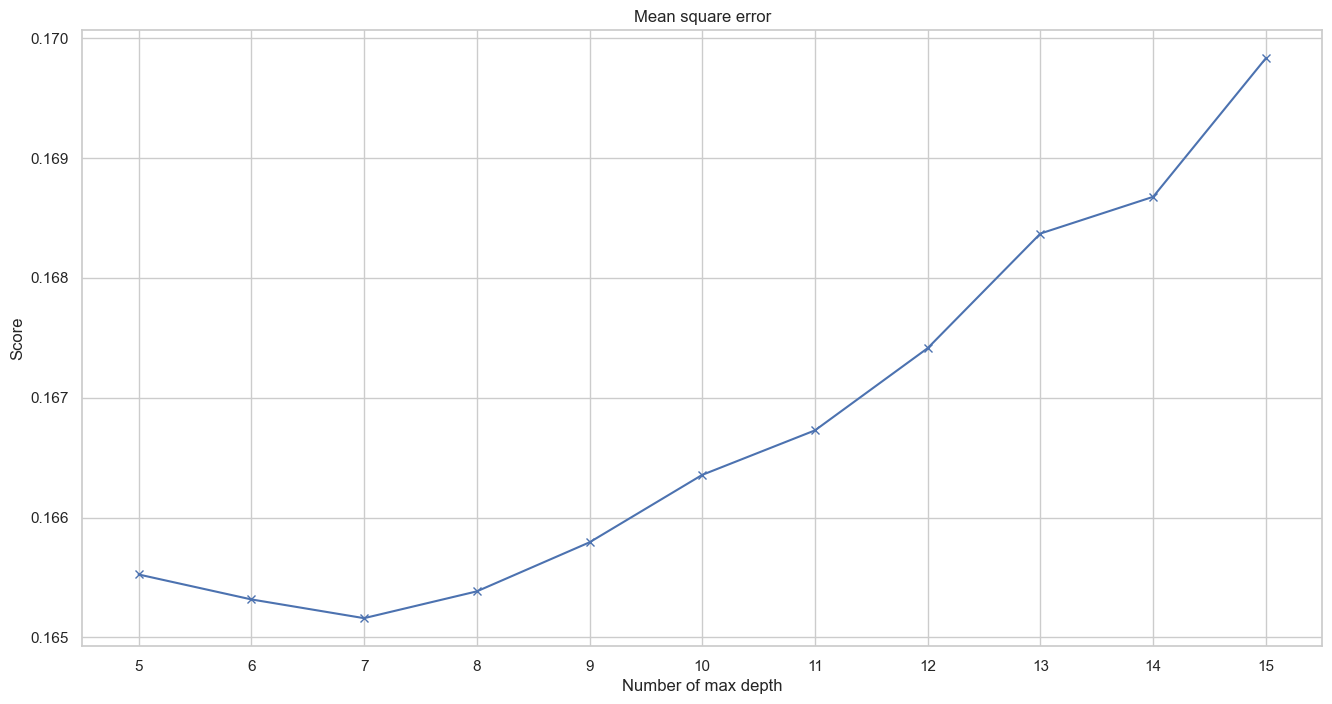

Best max depth :    7
Best MSE       :    0.16516053105953088


In [40]:
mse_by_max_depth = []

best_mse_score = float('inf')
best_max_depth = -1

for max_depth in range(5, 16):
  score = mean_squared_error(true_df, pred_df_by_max_depth[max_depth])
  mse_by_max_depth.append(score)
    
  if score < best_mse_score:
    best_mse_score = score
    best_max_depth = max_depth
        
pred_df = pred_df_by_max_depth[best_max_depth]
models = models_by_max_depth[best_max_depth]

plt.figure(figsize = (16, 8))
plt.plot(range(5, 16), mse_by_max_depth, 'bx-')
plt.xticks(range(5, 16))
plt.title('Mean square error')
plt.xlabel('Number of max depth')
plt.ylabel('Score')
plt.show()

print(f'Best max depth :    {best_max_depth}')
print(f'Best MSE       :    {best_mse_score}')

Quan sát biểu đồ trên, ta thấy mô hình có chất lượng tốt nhất khi đạt độ sâu `max_depth = 7` và cho kết quả của độ đo MSE là **0.1652**. Do đó ta sẽ chọn mô hình Random Forest đạt độ sâu tối đa `max_depth = 7` để thực nghiệm cho bài toán.

Xem thử các kết quả dự đoán của mô hình Random Forest trên dataframe `pred_df` với độ sâu `max_depth = 7`.

In [41]:
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
22000320020067784,0.586501,0.964209,0.908151,0.723129,0.520875,0.702055,0.690544,0.643084,0.761022,0.521871,0.638392,0.820756,0.401964,0.709181,0.547408,0.682725,0.723070,0.954466
22000321083750010,0.875429,0.991963,0.972005,0.896696,0.744561,0.874270,0.858543,0.734158,0.819651,0.665174,0.749148,0.921838,0.418625,0.835196,0.660458,0.788224,0.784921,0.984407
22000401381351532,0.702595,0.987823,0.951230,0.763006,0.616331,0.869497,0.802551,0.671544,0.801833,0.564609,0.750866,0.863067,0.335855,0.807953,0.572033,0.794039,0.844306,0.978848
22000407142860316,0.777309,0.991324,0.967566,0.867969,0.614448,0.851146,0.796749,0.670819,0.809054,0.584614,0.709143,0.903746,0.328103,0.780886,0.467217,0.740166,0.708486,0.958940
22000407572357990,0.852545,0.987288,0.966518,0.899657,0.638717,0.828388,0.726787,0.623260,0.755364,0.603437,0.724856,0.913198,0.334534,0.748536,0.542557,0.792678,0.713286,0.977741


Sau đó, ta sẽ xác định ngưỡng `threshold` cần thiết để xác định xác suất câu trả lời ở chính xác câu hỏi đó là đúng (1). Ta sẽ thử nghiệm với ngưỡng nhỏ nhất là 0.4 và ngưỡng lớn nhất là 0.8 với bước nhảy là 0.01. Ta sẽ trực quan hóa bằng biểu đồ đường thể hiện độ đo Macro F1 Score theo từng ngưỡng trên tập dự đoán. Trong đó:
- Trục hoành: thể hiện các giá trị ngưỡng từ 0.4 đến 0.8.
- Trục tung: thể hiện giá trị của độ đo Macro F1 Score tương ứng với ngưỡng trên.

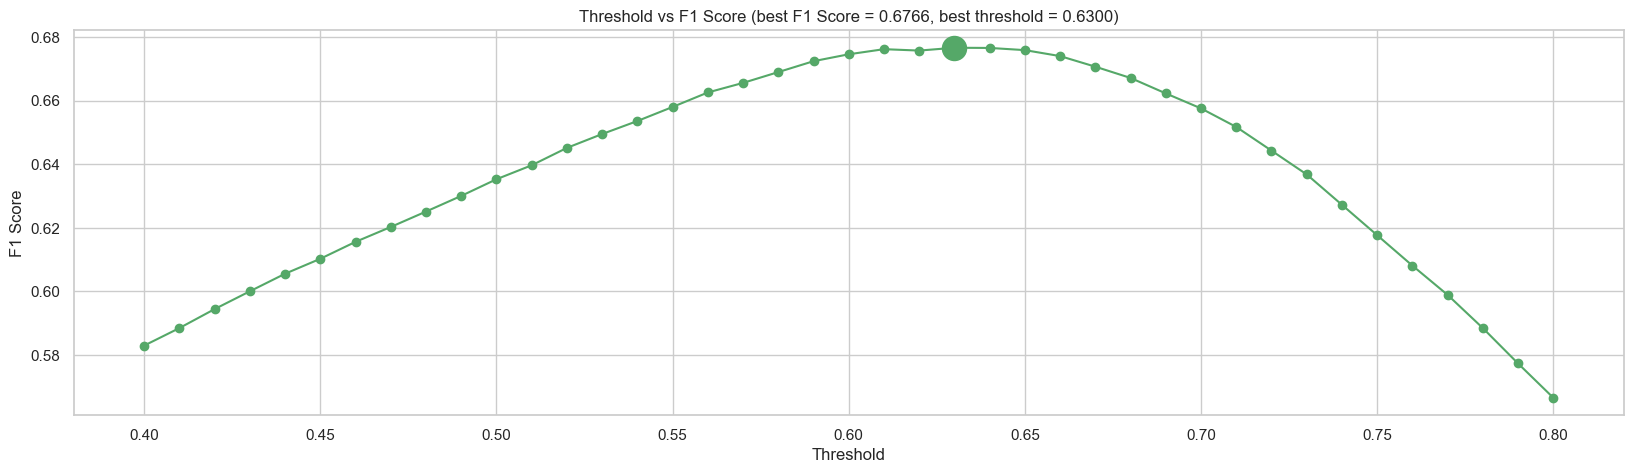

Threshold :    0.6300000000000002
F1-Score  :    0.676626954746673


In [42]:
def find_best_threshold(pred, true, min = 0.4, max = 0.81, step = 0.01):
  scores = []
  best_score = 0
  best_threshold = 0
    
  true_label = true.to_numpy().flatten()
  
  thresholds = np.arange(min, max, step)
  for threshold in thresholds:
    predict = (pred.to_numpy().flatten() > threshold).astype('int')
    m = f1_score(true_label, predict, average = 'macro')
    scores.append(m)
    if m > best_score:
      best_score = m
      best_threshold = threshold

  plt.figure(figsize = (20, 5))
  plt.scatter([best_threshold], [best_score], color = 'g', s = 300)
  plt.plot(thresholds, scores, marker = 'o', color = 'g')
  plt.xlabel('Threshold')
  plt.ylabel('F1 Score')
  plt.title(f'Threshold vs F1 Score (best F1 Score = {best_score:.4f}, best threshold = {best_threshold:.4f})')
  plt.show()

  return best_threshold, best_score

best_threshold, best_score = find_best_threshold(pred_df, true_df)
print(f'Threshold :    {best_threshold}')
print(f'F1-Score  :    {best_score}')

Quan sát biểu đồ trên, ta thấy tại ngưỡng `threshold = 0.63` cho độ đo Macro F1 Score là tốt nhất `0.6766`.

Sau đó, ta sẽ tạo ra dataframe mới `modified_pred_df` để lưu các giá trị dự đoán theo dạng nhị phân.
- Với các giá trị lớn hơn ngưỡng 0.63 được gán giá trị là 1 (câu trả lời đúng).
- Với các giá trị nhỏ hơn hoặc bằng 0.63 được gán giá trị là 0 (câu trả lời sai).

In [43]:
modified_pred_df = (pred_df > best_threshold).astype(int)
modified_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
22000320020067784,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
22000321083750010,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
22000401381351532,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
22000407142860316,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
22000407572357990,1,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1


Để dễ trực quan hơn, ta sẽ vẽ biểu đồ heatmap để trực quan hóa confusion matrix. Trong đó:
- **True positive (TP):** Số các ca dự đoán dương tính đúng hay dương tính thật.
- **True negative (TN):** Số các ca dự đoán âm tính đúng hay âm tính thật.
- **False positive (FP):** Số các ca dự đoán dương tính sai hay dương tính giả.
- **False negative (FN):** Số các ca dự đoán âm tính sai hay âm tính giả.

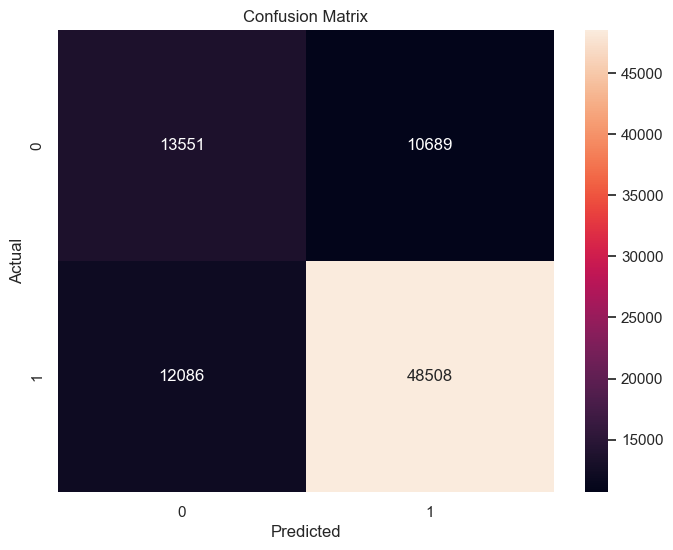

In [44]:
confusion = confusion_matrix(true_df.values.reshape((-1)), modified_pred_df.values.reshape((-1)))
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, fmt = 'd') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Quan sát biểu đồ trên, ta thấy có **48,508** mẫu được phân lớp dương đúng và **13,551** mẫu được phân lớp âm đúng. Trong khi đó có **10,689** mẫu âm được phân lớp thành dương và **12,086** mẫu dương được phân lớp thành âm.

Cuối cùng, ta sẽ tính độ đo Macro F1 Score theo từng câu hỏi tương ứng với mô hình.

In [45]:
f1_score_df = pd.DataFrame(columns = np.arange(1, 19), index = ['Random Forest', 'LightGBM', 'XGBoost'])
f1_score_df['Overall'] = np.nan
f1_score_df.index.name = 'Model'

for question in range(1, 19):
  m = f1_score(true_df[question - 1].values, (pred_df[question - 1].values > best_threshold).astype('int'), average = 'macro')
  f1_score_df[question]['Random Forest'] = m
  print(f'Question {question}: F1 = ', m)
  
m = f1_score(true_df.values.reshape((-1)), (pred_df.values.reshape((-1)) > best_threshold).astype('int'), average = 'macro')
f1_score_df['Overall']['Random Forest'] = m
print('==> Overall F1 =', m)

Question 1: F1 =  0.575198956100659
Question 2: F1 =  0.4938245086456879
Question 3: F1 =  0.4832236842105263
Question 4: F1 =  0.5698062214831476
Question 5: F1 =  0.566306720730712
Question 6: F1 =  0.6035182512762068
Question 7: F1 =  0.5786788821573361
Question 8: F1 =  0.5360938214080646
Question 9: F1 =  0.6040321374561081
Question 10: F1 =  0.47234080601223444
Question 11: F1 =  0.590451929132658
Question 12: F1 =  0.4817549241970164
Question 13: F1 =  0.42734151865119385
Question 14: F1 =  0.5934340004415714
Question 15: F1 =  0.41707914838820653
Question 16: F1 =  0.46516738809932656
Question 17: F1 =  0.5297487083651713
Question 18: F1 =  0.48760600130463144
==> Overall F1 = 0.676626954746673


**Nhận xét:** Các câu hỏi được đánh giá bằng độ đo Macro F1 Score thấp nhất là **0.4171** ở câu hỏi thứ 15 và được đánh giá cao nhất là **0.604** ở câu hỏi thứ 9.

### Mô hình Light Gradient-Boost Machine (LightGBM)

Mô hình **Light Gradient-Boost Machine (LightGBM)** là một thuật toán học máy dựa trên cây quyết định, được sử dụng để giải quyết các bài toán có sự chọn lọc và xếp hạng, như phân loại và dự đoán. Nó tập trung vào tối ưu hóa hiệu suất và tốc độ huấn luyện của mô hình.

**LightGBM** có thể được áp dụng cho nhiều lĩnh vực và bài toán khác nhau, bao gồm:
- Phân loại: mô hình có thể được sử dụng để phân loại các mẫu vào các lớp khác nhau dựa trên các đặc trưng của chúng. Ví dụ, nó có thể được áp dụng trong phân loại email spam hoặc phát hiện bệnh ung thư.
- Dự đoán: mô hình có thể được sử dụng để dự đoán giá trị của một biến mục tiêu dựa trên các biến đầu vào. Ví dụ, nó có thể được áp dụng trong dự đoán giá nhà, doanh thu kinh doanh, hoặc khả năng trả nợ của khách hàng.
- Xếp hạng: mô hình có khả năng xếp hạng các đối tượng dựa trên mức độ quan trọng hoặc ưu tiên. Ví dụ, nó có thể được sử dụng để xếp hạng sản phẩm dựa trên sự quan tâm của khách hàng hoặc xếp hạng trang web dựa trên độ phổ biến.

Dựa theo bài toán mà nhóm đặt ra ngay từ đầu là dự đoán tỉ lệ trả lời đúng của 18 câu hỏi của các học sinh, từ đó rút ra các kết luận hiệu suất học tập dựa trên việc chơi game. Nhóm nhận thấy mô hình **LightGBM** phù hợp với các bài toán phân loại nên tiến hành thử nghiệm với mô hình học máy này thứ hai. Đồng thời mô hình **LightGBM** cũng khắc phục được những nhược điểm của mô hình **Random Forest** truyền thống.

Đầu tiên, ta sẽ tạo một dataframe mới `pred_df` để lưu kết quả dự đoán của từng câu hỏi. Mặc định ban đầu các giá trị được dự đoán là 0. Sau đó, ta sẽ thực hiện phương pháp **Group K-Fold CV** để đánh giá một mô hình học máy một cách chính xác và đầy đủ, điều này giúp hạn chế tình trạng overfitting dữ liệu khi ta chọn cách chia tập train và test theo cách truyền thống nhưng tập train lại không có đầy đủ dữ liệu của tập test.

Ở đây, ta sẽ chia tập train thành `K = 5` phần. Ở mỗi phần của tập train sẽ chọn 1 trong 5 phần đó làm tập validation và 4 phần còn lại sẽ làm dữ liệu để training. Tương ứng với mỗi phần ta sẽ thực hiện các bước sau đây:
- Với từng câu hỏi của tập train, ta sẽ thực hiện phân loại các câu hỏi theo từng nhóm level. Tương ứng với nhóm level từ 0-4 dùng để huấn luyện cho các câu hỏi từ 1-3, tương ứng với nhóm level từ 5-12 dùng để huấn luyện cho các câu hỏi từ 4-13 và tương ứng với nhóm level từ 13-22 dùng để huấn luyện cho các câu hỏi từ 14-18.
- Sau đó, ta sẽ thực hiện chia tập train và validation theo từng K-Fold ở trên. Mô hình học máy ở đây là **LightGBM** với các tham số đầu vào như:
  - `objective = 'binary'`: xác định hàm mục tiêu cần được tối ưu hóa trong quá trình xây dựng cây quyết định, ở đây là bài toán phân loại nhị phân nên tham số này sẽ có giá trị là `binary`.
  - `metric = 'auc'`: xác định các độ đo được sử dụng để đánh giá hiệu suất của mô hình trong quá trình huấn luyện và kiểm tra, ở đây độ đo mà nhóm sử dụng cho mô hình là `auc`. **AUC (Area Under The Curve)** là độ đo biểu diễn mức độ phân loại của mô hình theo công thức sau:
    $$ AUC = P(score(x+) > score(x-)) $$
  - `learning_rate = 0.002`: tốc độ học của mô hình trong quá trình huấn luyện (có giá trị từ 0 đến 1).
  - `max_depth = 6`: độ sâu tối đa của cây quyết định trong mô hình.
  - `num_iterations = 1000`: số lượng vòng lặp trong quá trình huấn luyện mô hình. Mỗi vòng lặp tương ứng với việc xây dựng một cây quyết định mới.
  - `random_state = 42`: là một giá trị số ngẫu nhiên dùng để khởi tạo seed cho mô hình. Việc sử dụng tham số này để thống nhất các kết quả trong các lần chạy khác nhau của mô hình.
- Sau khi đưa vào huấn luyện, ta sẽ dự đoán kết quả trên tập validation và lưu các kết quả dự đoán này vào dataframe `pred_df` ở trên, ở đây ta sẽ dự đoán theo xác suất phân lớp bằng hàm `predict_proba`. Đồng thời, ta cũng lưu mô hình vào biến `models` để có thể sử dụng lại nếu mô hình của nhóm đó là tốt nhất.

In [46]:
# Tạo dataframe mới để lưu kết quả dự đoán của từng câu hỏi
pred_df = pd.DataFrame(data = np.zeros((len(train_df.index.unique()), 18)), index = train_df.index.unique())

# Tạo dict để lưu 18 mô hình học máy cho 18 câu hỏi
models = {}

# Định nghĩa K-Fold CV
groupKFold = GroupKFold(n_splits = 5)
for i, (train_index, test_index) in enumerate(groupKFold.split(X = train_df, groups = train_df.index)):
  print('#' * 25)
  print('### Fold', i + 1)
  print('#' * 25)
    
  # Duyệt từng câu hỏi từ câu 1 đến 18
  for question in range(1, 19): 
    print(question, ', ', end = '')
        
    # Phân loại các câu hỏi theo nhóm level
    if question <= 3: 
      level_group = 0
    elif question <= 13:
      level_group = 1
    elif question <= 18: 
      level_group = 2
            
    # Tập train
    train_X = train_df.iloc[train_index]
    train_X = train_X.loc[train_X['level_group'] == level_group]
    train_X_index = train_X.index.values
    train_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[train_X_index]
        
    # Tập valid
    valid_X = train_df.iloc[test_index]
    valid_X = valid_X.loc[valid_X['level_group'] == level_group]
    valid_X_index = valid_X.index.values
    valid_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[valid_X_index]
        
    # Huấn luyện mô hình LightGBM trên tập train
    clf = LGBMClassifier(objective = 'binary', metric = 'auc', learning_rate = 0.002, max_depth = 6, num_iterations = 1000, random_state = 42)
    clf.fit(train_X[train_X.columns.drop(['level_group'])].astype('float32'), train_y['correct'])
        
    # Dự đoán kết quả của mô hình trên tập valid
    models[f'{level_group}_{question}'] = clf
    pred_df.loc[valid_X_index, question - 1] = clf.predict_proba(valid_X[train_df.columns.drop('level_group')].astype('float32'))[:, 1]
        
  print()

#########################
### Fold 1
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 2
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 3
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 4
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 5
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 


Xem thử các kết quả dự đoán của mô hình LightGBM trên dataframe `pred_df`.

In [47]:
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.778844,0.986596,0.957725,0.820015,0.610372,0.837477,0.758556,0.660339,0.799501,0.576694,0.754978,0.855754,0.454897,0.774873,0.546817,0.792956,0.771223,0.980815
20090312433251036,0.817596,0.991908,0.953981,0.705139,0.461249,0.678784,0.624873,0.569262,0.717532,0.411148,0.591428,0.820261,0.201335,0.555226,0.202384,0.627316,0.607159,0.805936
20090312455206810,0.785970,0.990386,0.936773,0.862812,0.731541,0.901531,0.777947,0.834808,0.862233,0.646953,0.744085,0.886783,0.603942,0.751912,0.572657,0.812072,0.790754,0.927743
20090313091715820,0.754008,0.982495,0.956355,0.854599,0.559708,0.816901,0.785998,0.649168,0.732834,0.505973,0.678773,0.916427,0.221015,0.740954,0.457251,0.753330,0.674898,0.964061
20090313571836404,0.852712,0.994178,0.973897,0.910868,0.728763,0.894030,0.849824,0.716186,0.869576,0.640246,0.734673,0.925670,0.439457,0.820452,0.600206,0.791259,0.755354,0.985262


Sau khi thực hiện huấn luyện mô hình LightGBM ở trên, tiếp theo ta sẽ tạo một dataframe mới là `true_df` để lưu nhãn của từng câu hỏi theo tập `train_labels_df`.

In [48]:
true_df = pred_df.copy()
for question in range(1, 19):
  tmp = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[train_df.index.unique()]
  true_df[question - 1] = tmp['correct'].values

In [49]:
true_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
20090312433251036,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
20090313091715820,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1


Sau đó, ta sẽ xác định ngưỡng `threshold` cần thiết để xác định xác suất câu trả lời ở chính xác câu hỏi đó là đúng (1). Ta sẽ thử nghiệm với ngưỡng nhỏ nhất là 0.4 và ngưỡng lớn nhất là 0.8 với bước nhảy là 0.01. Ta sẽ trực quan hóa bằng biểu đồ đường thể hiện độ đo Macro F1 Score theo từng ngưỡng trên tập dự đoán. Trong đó:
- Trục hoành: thể hiện các giá trị ngưỡng từ 0.4 đến 0.8.
- Trục tung: thể hiện giá trị của độ đo Macro F1 Score tương ứng với ngưỡng trên.

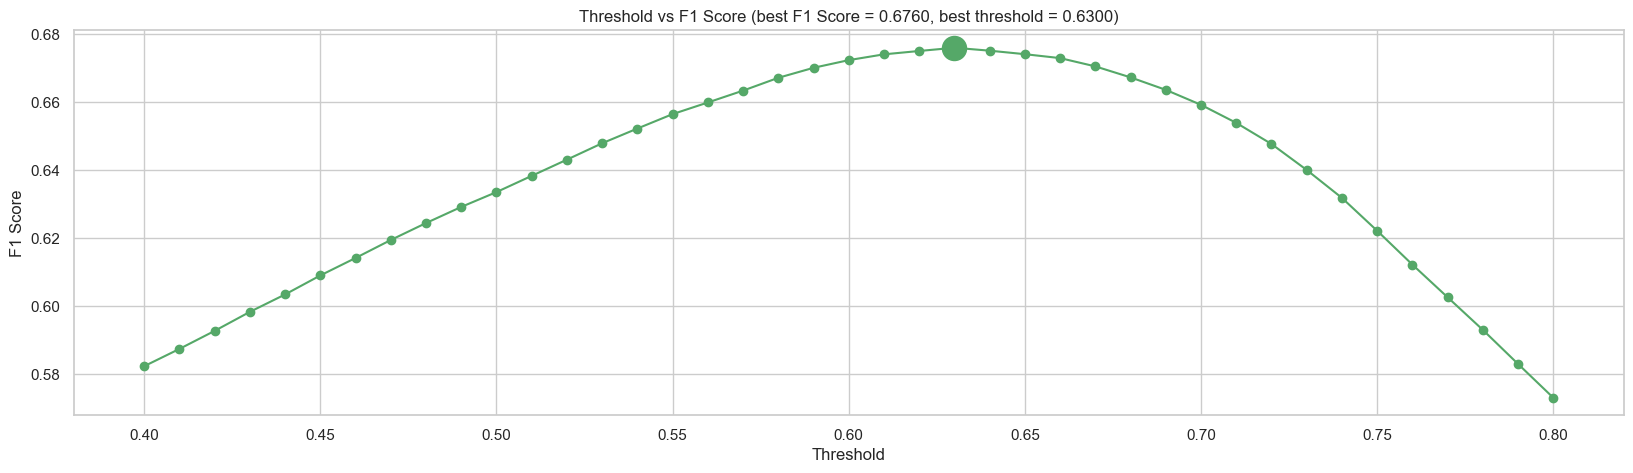

Threshold :    0.6300000000000002
F1-Score  :    0.6759741952973707


In [50]:
def find_best_threshold(pred, true, min = 0.4, max = 0.81, step = 0.01):
  scores = []
  best_score = 0
  best_threshold = 0
    
  true_label = true.to_numpy().flatten()
  
  thresholds = np.arange(min, max, step)
  for threshold in thresholds:
    predict = (pred.to_numpy().flatten() > threshold).astype('int')
    m = f1_score(true_label, predict, average = 'macro')
    scores.append(m)
    if m > best_score:
      best_score = m
      best_threshold = threshold

  plt.figure(figsize = (20, 5))
  plt.scatter([best_threshold], [best_score], color = 'g', s = 300)
  plt.plot(thresholds, scores, marker = 'o', color = 'g')
  plt.xlabel('Threshold')
  plt.ylabel('F1 Score')
  plt.title(f'Threshold vs F1 Score (best F1 Score = {best_score:.4f}, best threshold = {best_threshold:.4f})')
  plt.show()

  return best_threshold, best_score

best_threshold, best_score = find_best_threshold(pred_df, true_df)
print(f'Threshold :    {best_threshold}')
print(f'F1-Score  :    {best_score}')

Quan sát biểu đồ trên, ta thấy tại ngưỡng `threshold = 0.63` cho độ đo Macro F1 Score là tốt nhất `0.676`.

Sau đó, ta sẽ tạo ra dataframe mới `modified_pred_df` để lưu các giá trị dự đoán theo dạng nhị phân.
- Với các giá trị lớn hơn ngưỡng 0.63 được gán giá trị là 1 (câu trả lời đúng).
- Với các giá trị nhỏ hơn hoặc bằng 0.63 được gán giá trị là 0 (câu trả lời sai).

In [51]:
modified_pred_df = (pred_df > best_threshold).astype(int)
modified_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
20090312433251036,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1
20090313091715820,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1


Để dễ trực quan hơn, ta sẽ vẽ biểu đồ heatmap để trực quan hóa confusion matrix. Trong đó:
- **True positive (TP):** Số các ca dự đoán dương tính đúng hay dương tính thật.
- **True negative (TN):** Số các ca dự đoán âm tính đúng hay âm tính thật.
- **False positive (FP):** Số các ca dự đoán dương tính sai hay dương tính giả.
- **False negative (FN):** Số các ca dự đoán âm tính sai hay âm tính giả.

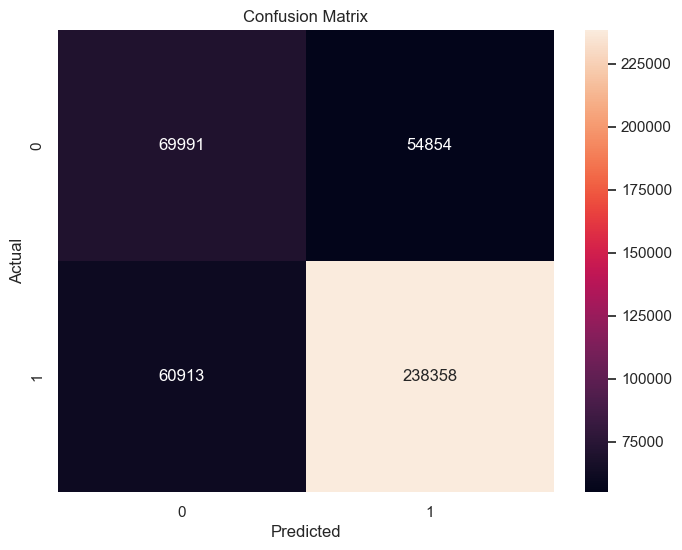

In [52]:
confusion = confusion_matrix(true_df.values.reshape((-1)), modified_pred_df.values.reshape((-1)))
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, fmt = 'd') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Quan sát biểu đồ trên, ta thấy có **238,358** mẫu được phân lớp dương đúng và **69,991** mẫu được phân lớp âm đúng. Trong khi đó có **54,854** mẫu âm được phân lớp thành dương và **60,913** mẫu dương được phân lớp thành âm.

Cuối cùng, ta sẽ tính độ đo Macro F1 Score theo từng câu hỏi tương ứng với mô hình.

In [53]:
for question in range(1, 19):
  m = f1_score(true_df[question - 1].values, (pred_df[question - 1].values > best_threshold).astype('int'), average = 'macro')
  f1_score_df[question]['LightGBM'] = m
  print(f'Question {question}: F1 = ', m)
  
m = f1_score(true_df.values.reshape((-1)), (pred_df.values.reshape((-1)) > best_threshold).astype('int'), average = 'macro')
f1_score_df['Overall']['LightGBM'] = m
print('==> Overall F1 =', m)

Question 1: F1 =  0.5832682735804419
Question 2: F1 =  0.4946162755780532
Question 3: F1 =  0.48410982401565417
Question 4: F1 =  0.5904118601977727
Question 5: F1 =  0.5529056011274455
Question 6: F1 =  0.5998652397734565
Question 7: F1 =  0.5794353626564557
Question 8: F1 =  0.5351541349673172
Question 9: F1 =  0.591409070960517
Question 10: F1 =  0.47105076531617135
Question 11: F1 =  0.5850277483178556
Question 12: F1 =  0.47887853715866946
Question 13: F1 =  0.4225111006427024
Question 14: F1 =  0.5970397129569179
Question 15: F1 =  0.43000977191361583
Question 16: F1 =  0.4546820921389586
Question 17: F1 =  0.5320019649928899
Question 18: F1 =  0.48734796893017995
==> Overall F1 = 0.6759741952973707


**Nhận xét:** Các câu hỏi được đánh giá bằng độ đo Macro F1 Score thấp nhất là **0.43** ở câu hỏi thứ 13 và được đánh giá cao nhất là **0.5998** ở câu hỏi thứ 6.

### Mô hình Extreme Gradient Boosting (XGBoost)

Mô hình **XGBoost (Extreme Gradient Boosting)** là một thuật toán học máy dựa trên cây quyết định, được sử dụng để giải quyết nhiều bài toán khác nhau trong lĩnh vực phân loại, dự đoán và xếp hạng.

**XGBoost** có thể được áp dụng cho nhiều lĩnh vực và bài toán khác nhau, bao gồm:
- Phân loại: mô hình có thể được sử dụng để phân loại một đối tượng vào các lớp khác nhau dựa trên các đặc trưng của nó. Ví dụ, nó có thể được áp dụng trong phân loại email spam, phân loại hình ảnh, hoặc phát hiện bệnh lý y tế.
- Dự đoán: mô hình có khả năng dự đoán giá trị của một biến mục tiêu dựa trên các biến đầu vào. Ví dụ, nó có thể được sử dụng trong dự đoán giá nhà, doanh thu kinh doanh, hoặc dự báo thời tiết.
- Xếp hạng: mô hình có thể được sử dụng để xếp hạng các đối tượng dựa trên mức độ quan trọng hoặc ưu tiên. Ví dụ, nó có thể được áp dụng trong xếp hạng sản phẩm dựa trên sự quan tâm của khách hàng hoặc xếp hạng trang web dựa trên độ phổ biến.
- Xử lý dữ liệu không cân bằng: mô hình có tính năng xử lý dữ liệu không cân bằng một cách hiệu quả. Điều này rất hữu ích khi mô hình phải đối mặt với các tập dữ liệu có mất cân bằng mẫu giữa các lớp.

Cũng tương tự với mô hình **LightGBM**, dựa theo bài toán mà nhóm đặt ra ngay từ đầu là dự đoán tỉ lệ trả lời đúng của 18 câu hỏi của các học sinh, từ đó rút ra các kết luận hiệu suất học tập dựa trên việc chơi game. Nhóm nhận thấy mô hình **XGBoost** phù hợp với các bài toán phân loại nên tiến hành thử nghiệm với mô hình học máy này cuối cùng, đồng thời **XGBoost** có thể xử lý được dữ liệu không cần bằng một cách hiệu quả nên đây là một lợi thế tốt hơn so với mô hình **LightGBM**.

Đầu tiên, ta sẽ tạo một dataframe mới `pred_df` để lưu kết quả dự đoán của từng câu hỏi. Mặc định ban đầu các giá trị được dự đoán là 0. Sau đó, ta sẽ thực hiện phương pháp Group K-Fold CV để đánh giá một mô hình học máy một cách chính xác và đầy đủ, điều này giúp hạn chế tình trạng overfitting dữ liệu khi ta chọn cách chia tập train và test theo cách truyền thống nhưng tập train lại không có đầy đủ dữ liệu của tập test.

Ở đây, ta sẽ chia tập train thành `K = 5` phần. Ở mỗi phần của tập train sẽ chọn 1 trong 5 phần đó làm tập validation và 4 phần còn lại sẽ làm dữ liệu để training. Tương ứng với mỗi phần ta sẽ thực hiện các bước sau đây:
- Với từng câu hỏi của tập train, ta sẽ thực hiện phân loại các câu hỏi theo từng nhóm level. Tương ứng với nhóm level từ 0-4 dùng để huấn luyện cho các câu hỏi từ 1-3, tương ứng với nhóm level từ 5-12 dùng để huấn luyện cho các câu hỏi từ 4-13 và tương ứng với nhóm level từ 13-22 dùng để huấn luyện cho các câu hỏi từ 14-18.
- Sau đó, ta sẽ thực hiện chia tập train và validation theo từng K-Fold ở trên. Mô hình học máy ở đây là **XGBoost** với các tham số đầu vào như:
  - `objective = 'binary:logistic'`: xác định hàm mục tiêu cần được tối ưu hóa trong quá trình xây dựng cây quyết định, ở đây là bài toán phân loại nhị phân và có tối ưu hóa hàm mất mác dựa trên hồi quy logistic nên tham số này sẽ có giá trị là `binary:logistic`.
  - `eval_metric = 'logloss'`: xác định các độ đo được sử dụng để đánh giá hiệu suất của mô hình trong quá trình huấn luyện và kiểm tra, ở đây độ đo mà nhóm sử dụng cho mô hình là `logloss`, đây là độ đo cho bài toán phân loại nhị phân hoặc đa lớp, giá trị của độ đo này càng nhỏ thì mô hình càng tốt.
  - `learning_rate = 0.05`: tốc độ học của mô hình trong quá trình huấn luyện (có giá trị từ 0 đến 1).
  - `max_depth = 3`: độ sâu tối đa của cây quyết định trong mô hình.
  - `n_estimators = 1000`: số lượng cây (estimators) được huấn luyện trong mô hình.
  - `early_stopping_rounds = 50`: được sử dụng để kiểm soát quá trình huấn luyện bằng cách dừng sớm (early stopping) nếu không có cải thiện đáng kể trong mất mát trên tập kiểm tra, ở đây ta sẽ dừng lại việc huấn luyện sau khi không thấy cải thiện mô hình trong 50 vòng lặp liên tiếp ở tập kiểm tra.
  - `tree_method = 'hist'`: xác định phương pháp xây dựng cây quyết định trong mô hình, ở đây ta sử dụng histogram để biểu diễn dữ liệu và xây dựng cây. Phương pháp này có hiệu suất tính toán cao và thích hợp cho các tập dữ liệu lớn. Nó là một phương pháp được tối ưu hóa đặc biệt trong XGBoost.
  - `subsample = 0.8`: tỷ lệ mẫu (sample) được sử dụng để huấn luyện mỗi cây trong mô hình. Giá trị này nằm trong khoảng từ 0 đến 1.
  - `colsample_bytree = 0.2`: tỷ lệ số lượng cột (features) được sử dụng để huấn luyện mỗi cây trong mô hình. Giá trị này nằm trong khoảng từ 0 đến 1.
  - `use_label_encoder = False`: có sử dụng trình Label Encoding để chuyển đổi các nhãn sang dạng số không.
  - `seed = 42`: là một giá trị số ngẫu nhiên dùng để khởi tạo seed cho mô hình. Việc sử dụng tham số này để thống nhất các kết quả trong các lần chạy khác nhau của mô hình.
- Sau khi đưa vào huấn luyện, ta sẽ dự đoán kết quả trên tập validation và lưu các kết quả dự đoán này vào dataframe `pred_df` ở trên, ở đây ta sẽ dự đoán theo xác suất phân lớp bằng hàm `predict_proba`. Đồng thời, ta cũng lưu mô hình vào biến `models` để có thể sử dụng lại nếu mô hình của nhóm đó là tốt nhất.

In [54]:
# Tạo dataframe mới để lưu kết quả dự đoán của từng câu hỏi
pred_df = pd.DataFrame(data = np.zeros((len(train_df.index.unique()), 18)), index = train_df.index.unique())

# Tạo dict để lưu 18 mô hình học máy cho 18 câu hỏi
models = {}

# Định nghĩa K-Fold CV
groupKFold = GroupKFold(n_splits = 5)
for i, (train_index, test_index) in enumerate(groupKFold.split(X = train_df, groups = train_df.index)):
  print('#' * 25)
  print('### Fold', i + 1)
  print('#' * 25)
    
  # Duyệt từng câu hỏi từ câu 1 đến 18
  for question in range(1, 19): 
    print(question, ', ', end = '')
        
    # Phân loại các câu hỏi theo nhóm level
    if question <= 3: 
      level_group = 0
    elif question <= 13:
      level_group = 1
    elif question <= 18: 
      level_group = 2
            
    # Tập train
    train_X = train_df.iloc[train_index]
    train_X = train_X.loc[train_X['level_group'] == level_group]
    train_X_index = train_X.index.values
    train_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[train_X_index]
        
    # Tập valid
    valid_X = train_df.iloc[test_index]
    valid_X = valid_X.loc[valid_X['level_group'] == level_group]
    valid_X_index = valid_X.index.values
    valid_y = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[valid_X_index]
        
    # Huấn luyện mô hình XGBoost trên tập train
    clf = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', learning_rate = 0.05, max_depth = 3, n_estimators = 1000, 
                        early_stopping_rounds = 50, tree_method = 'hist', subsample = 0.8, colsample_bytree = 0.2, use_label_encoder = False, seed = 42)
    clf.fit(train_X[train_X.columns.drop(['level_group'])].astype('float32'), train_y['correct'], 
            eval_set = [(valid_X[valid_X.columns.drop(['level_group'])].astype('float32'), valid_y['correct'])], verbose = 0)
        
    # Dự đoán kết quả của mô hình trên tập valid
    models[f'{level_group}_{question}'] = clf
    pred_df.loc[valid_X_index, question - 1] = clf.predict_proba(valid_X[train_df.columns.drop('level_group')].astype('float32'))[:, 1]
        
  print()

#########################
### Fold 1
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 2
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 3
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 4
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
#########################
### Fold 5
#########################
1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 


Xem thử các kết quả dự đoán của mô hình XGBoost trên dataframe `pred_df`.

In [55]:
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,0.813837,0.989247,0.958132,0.831010,0.613154,0.854630,0.777243,0.715329,0.801322,0.592556,0.731825,0.863575,0.485705,0.792060,0.527379,0.813754,0.804931,0.983996
20090312433251036,0.863156,0.991137,0.966687,0.680547,0.402403,0.701994,0.691518,0.554210,0.697929,0.427143,0.548210,0.838634,0.189111,0.543623,0.123463,0.659443,0.593251,0.822778
20090312455206810,0.766390,0.990678,0.962214,0.766940,0.670754,0.902464,0.816845,0.762663,0.863822,0.637885,0.792011,0.852426,0.627707,0.788498,0.577987,0.814403,0.810818,0.969175
20090313091715820,0.716240,0.976941,0.948146,0.847358,0.576892,0.830795,0.766349,0.617492,0.747954,0.548122,0.688809,0.901628,0.251474,0.730389,0.454402,0.742773,0.689109,0.968166
20090313571836404,0.913337,0.988543,0.976593,0.900507,0.750977,0.938385,0.869574,0.733121,0.847670,0.683889,0.756969,0.903937,0.422602,0.838564,0.575364,0.781902,0.778083,0.992248


Sau khi thực hiện huấn luyện mô hình XGBoost ở trên, tiếp theo ta sẽ tạo một dataframe mới là `true_df` để lưu nhãn của từng câu hỏi theo tập `train_labels_df`.

In [56]:
true_df = pred_df.copy()
for question in range(1, 19):
  tmp = train_labels_df.loc[train_labels_df['question'] == question].set_index('session').loc[train_df.index.unique()]
  true_df[question - 1] = tmp['correct'].values

In [57]:
true_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
20090312433251036,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
20090313091715820,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1


Sau đó, ta sẽ xác định ngưỡng `threshold` cần thiết để xác định xác suất câu trả lời ở chính xác câu hỏi đó là đúng (1). Ta sẽ thử nghiệm với ngưỡng nhỏ nhất là 0.4 và ngưỡng lớn nhất là 0.8 với bước nhảy là 0.01. Ta sẽ trực quan hóa bằng biểu đồ đường thể hiện độ đo Macro F1 Score theo từng ngưỡng trên tập dự đoán. Trong đó:
- Trục hoành: thể hiện các giá trị ngưỡng từ 0.4 đến 0.8.
- Trục tung: thể hiện giá trị của độ đo Macro F1 Score tương ứng với ngưỡng trên.

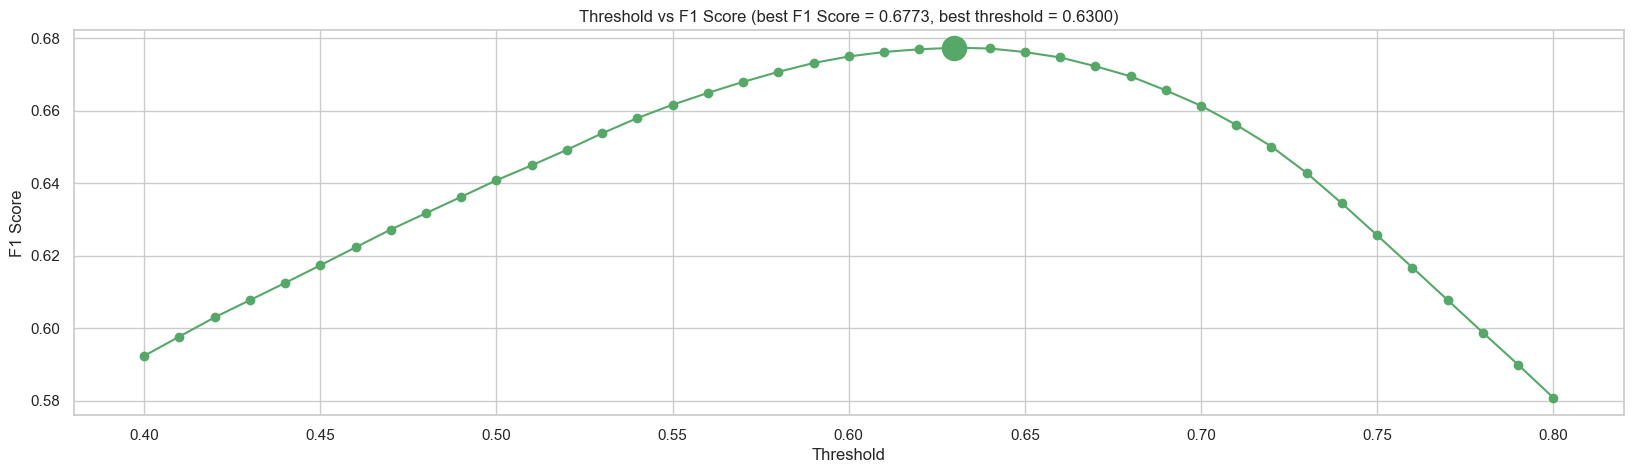

Threshold :    0.6300000000000002
F1-Score  :    0.6773280906003097


In [58]:
def find_best_threshold(pred, true, min = 0.4, max = 0.81, step = 0.01):
  scores = []
  best_score = 0
  best_threshold = 0
    
  true_label = true.to_numpy().flatten()
  
  thresholds = np.arange(min, max, step)
  for threshold in thresholds:
    predict = (pred.to_numpy().flatten() > threshold).astype('int')
    m = f1_score(true_label, predict, average = 'macro')
    scores.append(m)
    if m > best_score:
      best_score = m
      best_threshold = threshold

  plt.figure(figsize = (20, 5))
  plt.scatter([best_threshold], [best_score], color = 'g', s = 300)
  plt.plot(thresholds, scores, marker = 'o', color = 'g')
  plt.xlabel('Threshold')
  plt.ylabel('F1 Score')
  plt.title(f'Threshold vs F1 Score (best F1 Score = {best_score:.4f}, best threshold = {best_threshold:.4f})')
  plt.show()

  return best_threshold, best_score

best_threshold, best_score = find_best_threshold(pred_df, true_df)
print(f'Threshold :    {best_threshold}')
print(f'F1-Score  :    {best_score}')

Quan sát biểu đồ trên, ta thấy tại ngưỡng `threshold = 0.63` cho độ đo Macro F1 Score là tốt nhất `0.6773`.

Sau đó, ta sẽ tạo ra dataframe mới `modified_pred_df` để lưu các giá trị dự đoán theo dạng nhị phân.
- Với các giá trị lớn hơn ngưỡng 0.63 được gán giá trị là 1 (câu trả lời đúng).
- Với các giá trị nhỏ hơn hoặc bằng 0.63 được gán giá trị là 0 (câu trả lời sai).

In [59]:
modified_pred_df = (pred_df > best_threshold).astype(int)
modified_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1
20090312433251036,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1
20090313091715820,1,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1


Để dễ trực quan hơn, ta sẽ vẽ biểu đồ heatmap để trực quan hóa confusion matrix. Trong đó:
- **True positive (TP):** Số các ca dự đoán dương tính đúng hay dương tính thật.
- **True negative (TN):** Số các ca dự đoán âm tính đúng hay âm tính thật.
- **False positive (FP):** Số các ca dự đoán dương tính sai hay dương tính giả.
- **False negative (FN):** Số các ca dự đoán âm tính sai hay âm tính giả.

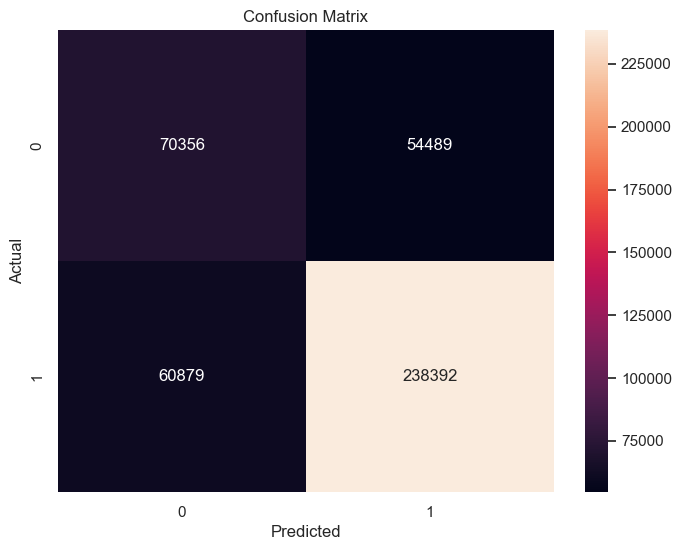

In [60]:
confusion = confusion_matrix(true_df.values.reshape((-1)), modified_pred_df.values.reshape((-1)))
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, fmt = 'd') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Quan sát biểu đồ trên, ta thấy có **238,392** mẫu được phân lớp dương đúng và **70,356** mẫu được phân lớp âm đúng. Trong khi đó có **54,489** mẫu âm được phân lớp thành dương và **60,879** mẫu dương được phân lớp thành âm.

Cuối cùng, ta sẽ tính độ đo Macro F1 Score theo từng câu hỏi tương ứng với mô hình.

In [61]:
for question in range(1, 19):
  m = f1_score(true_df[question - 1].values, (pred_df[question - 1].values > best_threshold).astype('int'), average = 'macro')
  f1_score_df[question]['XGBoost'] = m
  print(f'Question {question}: F1 = ', m)
  
m = f1_score(true_df.values.reshape((-1)), (pred_df.values.reshape((-1)) > best_threshold).astype('int'), average = 'macro')
f1_score_df['Overall']['XGBoost'] = m
print('==> Overall F1 =', m)

Question 1: F1 =  0.6069761414627936
Question 2: F1 =  0.49462711537224113
Question 3: F1 =  0.4860889423378448
Question 4: F1 =  0.6105723784492638
Question 5: F1 =  0.5709114757532252
Question 6: F1 =  0.6102188549666188
Question 7: F1 =  0.5819442447370972
Question 8: F1 =  0.5364318982691155
Question 9: F1 =  0.5999601298926132
Question 10: F1 =  0.513189800216344
Question 11: F1 =  0.5868349517595436
Question 12: F1 =  0.48438817730815065
Question 13: F1 =  0.4265533261815091
Question 14: F1 =  0.6057757857672315
Question 15: F1 =  0.5011674774316789
Question 16: F1 =  0.4537346635367231
Question 17: F1 =  0.5382065440162445
Question 18: F1 =  0.48733681462140993
==> Overall F1 = 0.6773280906003097


**Nhận xét:** Các câu hỏi được đánh giá bằng độ đo Macro F1 Score thấp nhất là **0.4266** ở câu hỏi thứ 13 và được đánh giá cao nhất là **0.6106** ở câu hỏi thứ 4.

## G. ĐÁNH GIÁ KẾT QUẢ

Ở đây ta sử dụng độ đo F1 Score để đánh giá cả quá trình học máy của một mô hình. Lí do là vì nếu đánh giá bằng độ đo **precision** (tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người được chẩn đoán là dương tính) hay bằng độ đo **recall** (tỉ lệ người được chẩn đoán là dương tính thật sự mắc bệnh trên tổng số người thật sự mắc bệnh) thì không đánh giá tổng quát được chất lượng của mô hình.
- Chỉ dùng **precision**, mô hình chỉ đưa ra dự đoán cho một điểm mà nó chắc chắn nhất. Khi đó precision = 1, tuy nhiên ta không thể nói là mô hình này tốt.
- Chỉ dùng **recall**, nếu mô hình dự đoán tất cả các điểm đều là positive. Khi đó recall = 1, tuy nhiên ta cũng không thể nói đây là mô hình tốt.

Khi đó F1 Score được sử dụng là trung bình điều hòa (harmonic mean) của precision và recall (giả sử hai đại lượng này khác 0).

$$ Precision = \frac{TP}{TP + FP} $$

$$ Recall = \frac{TP}{TP + FN} $$

$$ F1 = 2 \frac{Precision * Recall}{Precision + Recall} $$

Với bài toán phân lớp nhiều lớp, ta lần lượt xem một lớp là positive, các lớp còn lại là negative. Khi đó, ta có hai cách tính F1 Score là:
- **Macro F1 Score:** với MacroPrecision và MacroRecall là trung bình cộng của precision và recall theo các lớp.
$$ MacroF1 = 2 \frac{MacroPrecision * MacroRecall}{MacroPrecision + MacroRecall} $$
- **Micro F1 Score:** với MicroPrecision là tỉ lệ tổng số điểm của toàn bộ các điểm positive thuộc các lớp trên tổng số điểm mô hình dự đoán là positive thuộc các lớp. MicroRecall được tính bằng cách tương tự.
$$ MicroF1 = 2 \frac{MicroPrecision * MicroRecall}{MicroPrecision + MicroRecall} $$

Sau đó, nhóm sẽ hiển thị các giá trị đo được từ độ đo Macro F1 Score được lưu từ dataframe `f1_score_df` đã khởi tạo trước đó.

In [62]:
f1_score_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Overall
Model,,,,,,,,,,,,,,,,,,,
Random Forest,0.575199,0.493825,0.483224,0.569806,0.566307,0.603518,0.578679,0.536094,0.604032,0.472341,0.590452,0.481755,0.427342,0.593434,0.417079,0.465167,0.529749,0.487606,0.676627
LightGBM,0.583268,0.494616,0.484110,0.590412,0.552906,0.599865,0.579435,0.535154,0.591409,0.471051,0.585028,0.478879,0.422511,0.597040,0.430010,0.454682,0.532002,0.487348,0.675974
XGBoost,0.606976,0.494627,0.486089,0.610572,0.570911,0.610219,0.581944,0.536432,0.599960,0.513190,0.586835,0.484388,0.426553,0.605776,0.501167,0.453735,0.538207,0.487337,0.677328


Để dễ trực quan hóa hơn, nhóm sẽ dùng biểu đồ heatmap để so sánh các kết quả từ độ đo Macro F1 Score của 3 mô hình học máy trên theo từng câu hỏi. Trong đó:
- Trục hoành: thể hiện số các câu hỏi (từ 1 đến 18).
- Trục tung: thể hiện các lọai mô hình học máy.

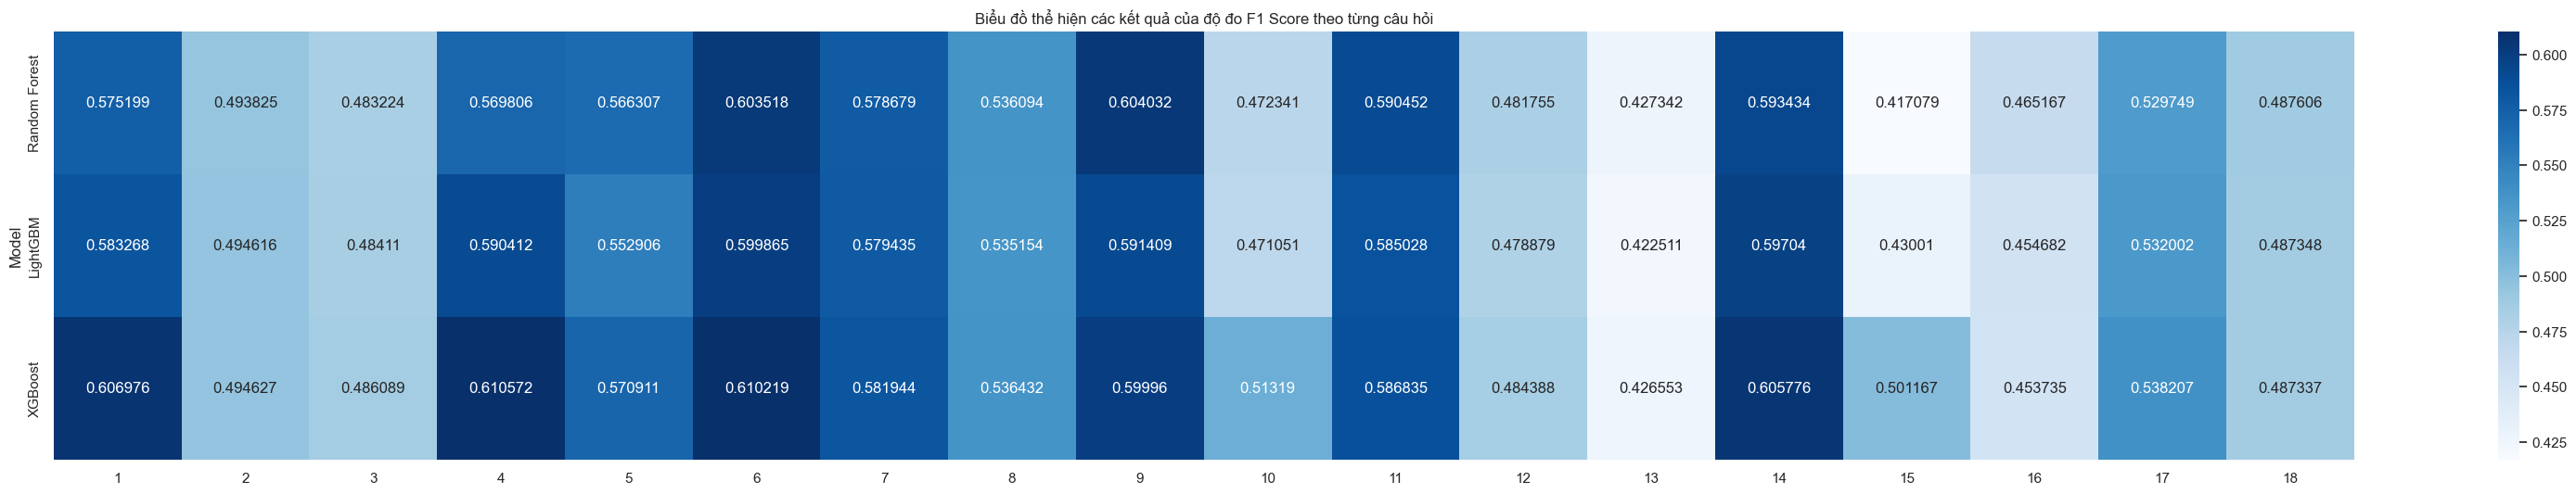

In [63]:
plt.figure(figsize = (40, 6))
sns.heatmap(f1_score_df[np.arange(1, 19)].astype(float), annot = True, cmap = 'Blues', fmt = '.6g')
plt.title('Biểu đồ thể hiện các kết quả của độ đo F1 Score theo từng câu hỏi')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên, ta thấy độ chênh lệch về độ đo Macro F1 Score giữa các mô hình không quá nhiều. Tuy nhiên, ở các **câu hỏi 10** và **câu hỏi 15** có sự khác biệt lớn hơn giữa mô hình XGBoost và các mô hình còn lại. Về tổng thể mô hình XGBoost cho các kết quả tốt nhất, trong khi mô hình LightGBM và Random Forest có sự tương đồng nhau về kết quả đánh giá.

## H. TÀI LIỆU THAM KHẢO

- [1] https://www.kaggle.com/competitions/predict-student-performance-from-game-play
- [2] https://www.kaggle.com/code/kevinmorgado/student-performance-eda
- [3] https://www.kaggle.com/code/cdeotte/random-forest-baseline-0-664
- [4] https://www.kaggle.com/code/harrynelson/xgboost-baseline-0-676-a7cb02
- [5] Slide và bài giảng của thầy Lê Ngọc Thành.